In [11]:
from LingerRegression_boston import *

# 波士顿房价分析


~~~
CRIM：城镇的人均犯罪率
ZN：大于25,000平方英尺的地块的住宅用地比例。
INDUS：每个镇的非零售业务英亩的比例。
CHAS：查尔斯河虚拟变量（如果环河，则等于1；否则等于0）
NOX：一氧化氮的浓度（百万分之几）
RM：每个住宅的平均房间数
AGE：1940年之前建造的自有住房的比例
DIS：到五个波士顿就业中心的加权距离
RAD：径向公路通达性的指标
TAX：每$ 10,000的全值财产税率
PTRATIO：各镇的师生比率
B：计算方法为1000（Bk-0.63）²，其中Bk是按城镇划分的非裔美国人的比例
LSTAT：底层人口的百分比
MEDV：自有住房数的中位数，单位为$ 1000
~~~

## 数据分析：

In [32]:
%matplotlib inline                             
#解决中文显示问题
plt.rcParams["font.sans-serif"]="SimHei"   #修改字体的样式可以解决标题中文显示乱码的问题
plt.rcParams["axes.unicode_minus"]=False  #该项可以解决绘图中的坐标轴负数无法显示的问题

In [33]:
df=pd.read_csv('housing.csv',encoding='gbk')    #数据的读入
df.describe()
columns=list(df)                               #获取列索引
columns

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT',
 'MEDV']

array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>,
        <AxesSubplot:title={'center':'CHAS'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'DIS'}>],
       [<AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'LSTAT'}>,
        <AxesSubplot:title={'center':'MEDV'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

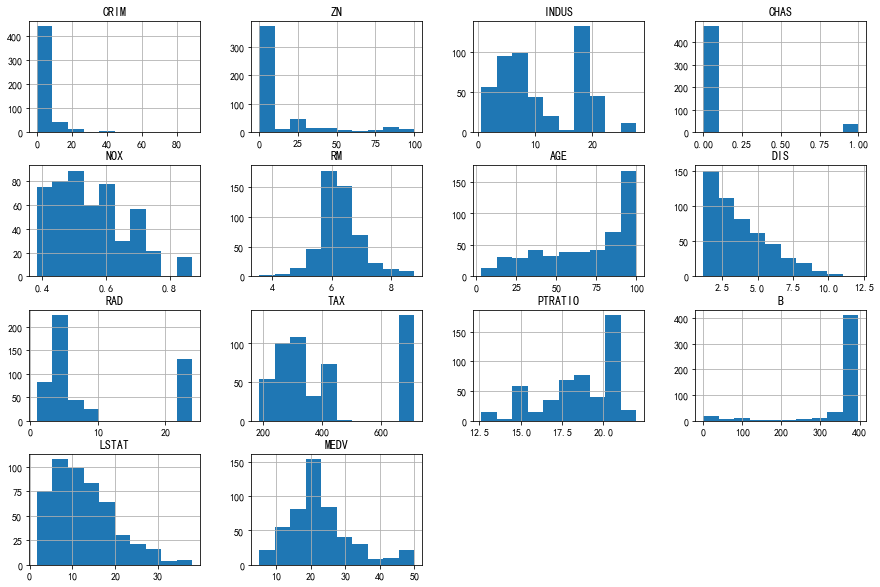

In [34]:
#特征直方图
df.hist(figsize=(15,10))   #figsize 定义画布尺寸

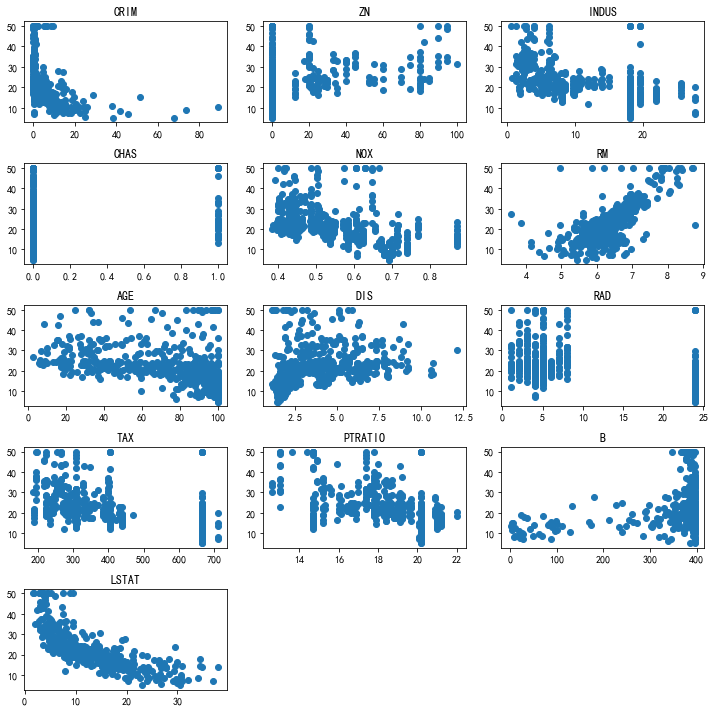

In [35]:
#可视化：绘制多幅特征与目标的相关性（13-->房价） 
import math
cols=3                   #每行3幅散点图
rows=math.ceil(13/cols) #向上取整，5行
plt.figure(figsize=(10,10))
for idx in range(13):
    plt.subplot(rows,cols,idx+1)
    plt.scatter(df[ columns[idx] ],df["MEDV"])    #绘制与每个特征量与房价的散点图
    plt.title(columns[idx])                       #设置图标题

plt.tight_layout()                                #自适应

### 分析特征量之间的相关系数：
### 根据相关系数图对每个特征量两两之间的相关性分析

+ 这里可以看到RM和LSTAT这两个特征量与房价的相关性系数较大，分别为0.70和-0.74，故RM和LSTAT这两个特征量与房价的相关性较大
+ 其次，相关性较大的特征量还有PTRATIO和INDUS,分别为-0.48和-0.5


In [36]:
#统计学：相关系数（13->房价）
corr=df.corr() #特征两两之间的相关性,加个绝对值 全都变正
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


### 根据相关系数热力图进行数据分析
_根据相关系数热力图也可以得出同样的结论(如下图)_

<AxesSubplot:>

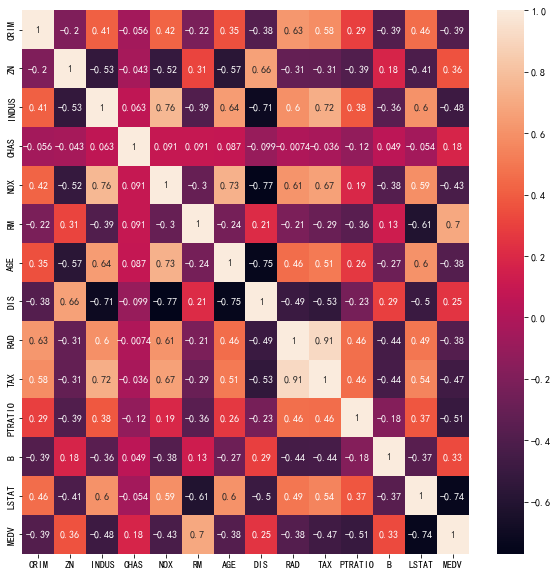

In [37]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

**下面根据每个特征量与房价的散点图来进一步明确相关性**
**相关性：**

**1. 相关性有正相关，负相关，和不相关（相关性弱）**

**2. 正相关：因变量随自变量增大而呈现增大的趋势**

**3. 负相关：因变量随自变量增大而呈现减小的趋势**

**4. 不相关：因变量不随自变量增大或减少来呈现增大或减少的趋势，是一些离散的点**

**5. 0.8以上高度相关； 0.5-0.8 中度相关； 0.3-0.5 低度相关； 小于0.3 极弱，可视为不相关**

***
***
***


## 数据处理及其可视化：


In [38]:
#设置绘图大小
plt.style.use({'figure.figsize':(15,8)})

In [39]:
#获取房价中位数这个数据y
y=df.iloc[:,13]

(506,)
(506,)


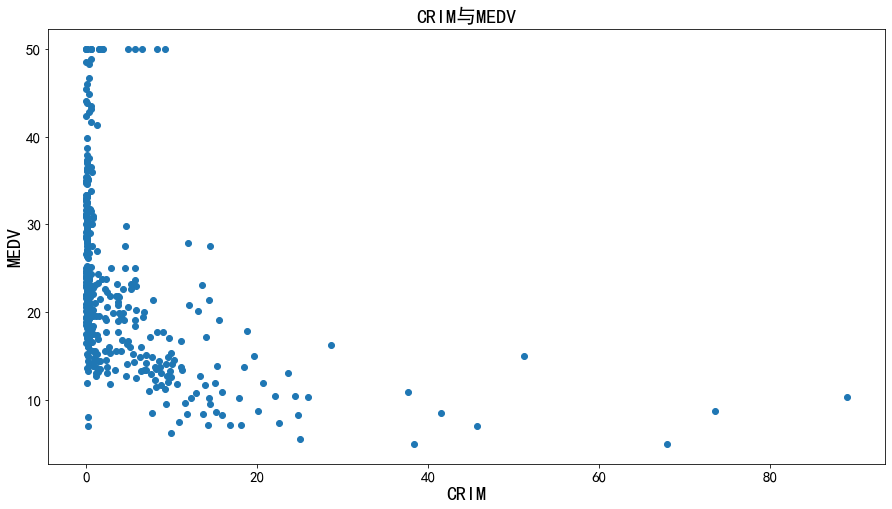

In [40]:
#每一个特征量与房价的相关性
#犯罪率与房价的散点图
plt.scatter(df['CRIM'],y)

print(df['CRIM'].shape)
print(y.shape)
plt.title('CRIM与MEDV',size=20)
plt.xlabel('CRIM',size=20)
plt.ylabel('MEDV',size=20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

_分析：由图可知，房价不随犯罪率增大而增大或减少，同时在犯罪率较低的地方，房价有高也有低，故相关性较弱_

**下面是该特征量的对房价预测值**

iteration:0  /  均方误差:0.404221
iteration:1  /  均方误差:0.278056
iteration:2  /  均方误差:0.197317
iteration:3  /  均方误差:0.145644
iteration:4  /  均方误差:0.112570
iteration:5  /  均方误差:0.091397
iteration:6  /  均方误差:0.077838
iteration:7  /  均方误差:0.069153
iteration:8  /  均方误差:0.063584
iteration:9  /  均方误差:0.060011
iteration:10  /  均方误差:0.057715
iteration:11  /  均方误差:0.056235
iteration:12  /  均方误差:0.055278
iteration:13  /  均方误差:0.054656
iteration:14  /  均方误差:0.054247
iteration:15  /  均方误差:0.053976
iteration:16  /  均方误差:0.053792
iteration:17  /  均方误差:0.053664
iteration:18  /  均方误差:0.053572
iteration:19  /  均方误差:0.053504
iteration:20  /  均方误差:0.053449
iteration:21  /  均方误差:0.053405
iteration:22  /  均方误差:0.053366
iteration:23  /  均方误差:0.053332
iteration:24  /  均方误差:0.053300
iteration:25  /  均方误差:0.053269
iteration:26  /  均方误差:0.053240
iteration:27  /  均方误差:0.053211
iteration:28  /  均方误差:0.053183
iteration:29  /  均方误差:0.053155
iteration:30  /  均方误差:0.053127
iteration:31  /  均方误差:0.053099
iteration:32  /  均

iteration:585  /  均方误差:0.043661
iteration:586  /  均方误差:0.043651
iteration:587  /  均方误差:0.043641
iteration:588  /  均方误差:0.043632
iteration:589  /  均方误差:0.043622
iteration:590  /  均方误差:0.043612
iteration:591  /  均方误差:0.043603
iteration:592  /  均方误差:0.043593
iteration:593  /  均方误差:0.043584
iteration:594  /  均方误差:0.043574
iteration:595  /  均方误差:0.043565
iteration:596  /  均方误差:0.043555
iteration:597  /  均方误差:0.043546
iteration:598  /  均方误差:0.043536
iteration:599  /  均方误差:0.043527
iteration:600  /  均方误差:0.043517
iteration:601  /  均方误差:0.043508
iteration:602  /  均方误差:0.043498
iteration:603  /  均方误差:0.043489
iteration:604  /  均方误差:0.043480
iteration:605  /  均方误差:0.043470
iteration:606  /  均方误差:0.043461
iteration:607  /  均方误差:0.043452
iteration:608  /  均方误差:0.043442
iteration:609  /  均方误差:0.043433
iteration:610  /  均方误差:0.043424
iteration:611  /  均方误差:0.043414
iteration:612  /  均方误差:0.043405
iteration:613  /  均方误差:0.043396
iteration:614  /  均方误差:0.043387
iteration:615  /  均方误差:0.043378
iteratio

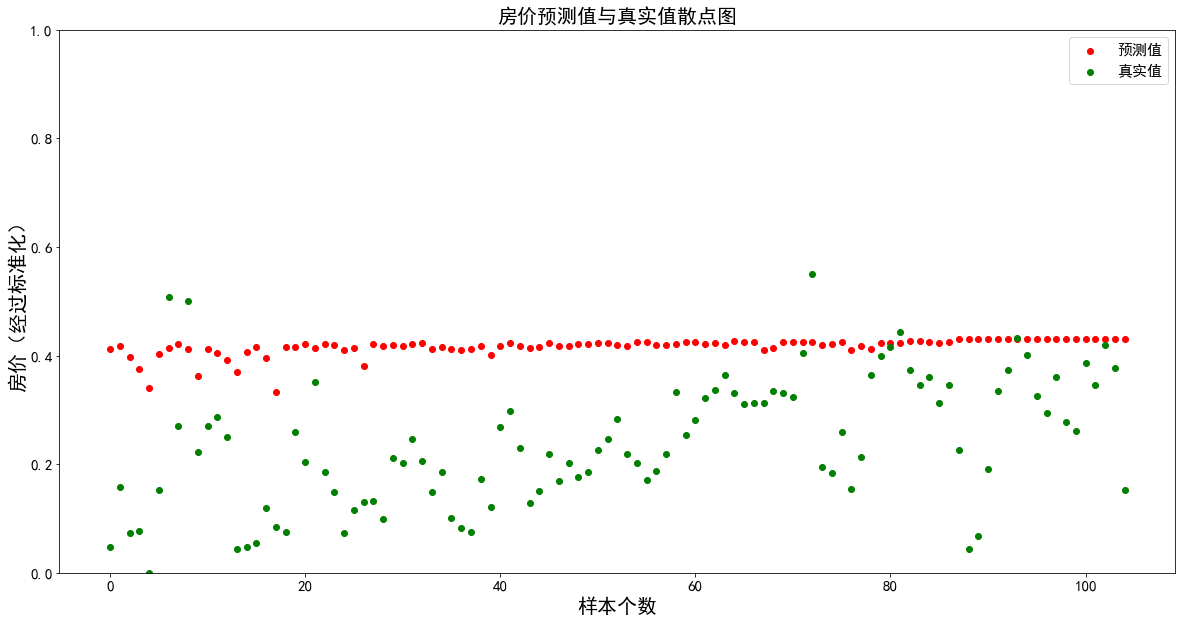

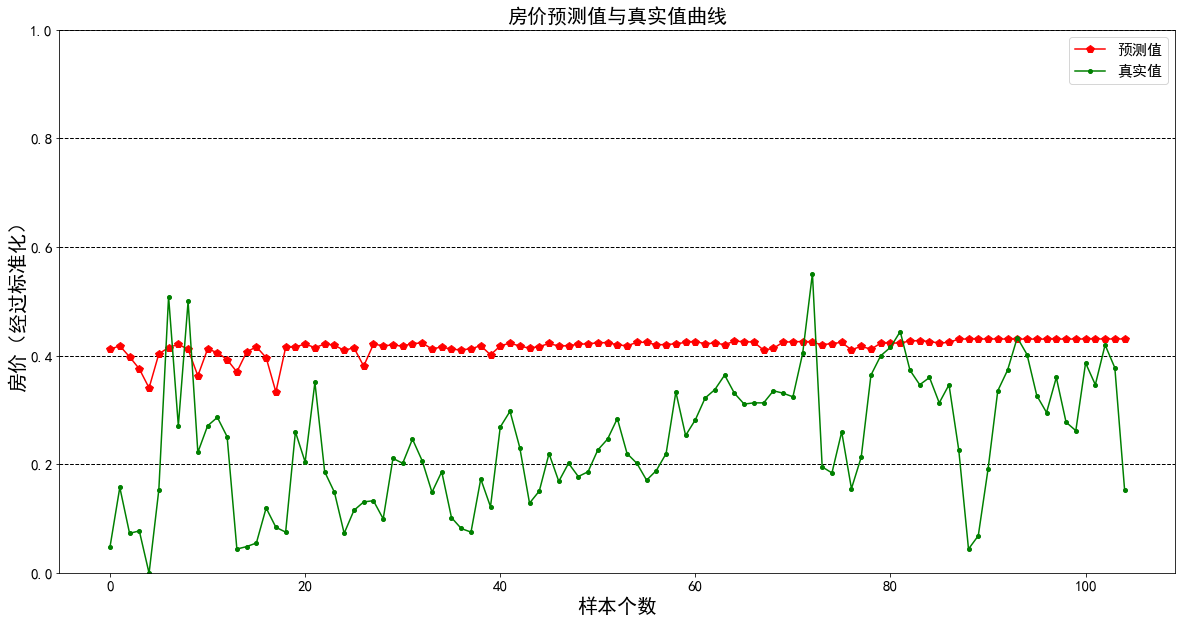

In [41]:
a0=LingerRegression_boston()          #CRIM特征量对房价的预测
a0.separate([0], 1)
a0.gradient_descent()
a0.drawScatter()
a0.drawPlot()

***
***

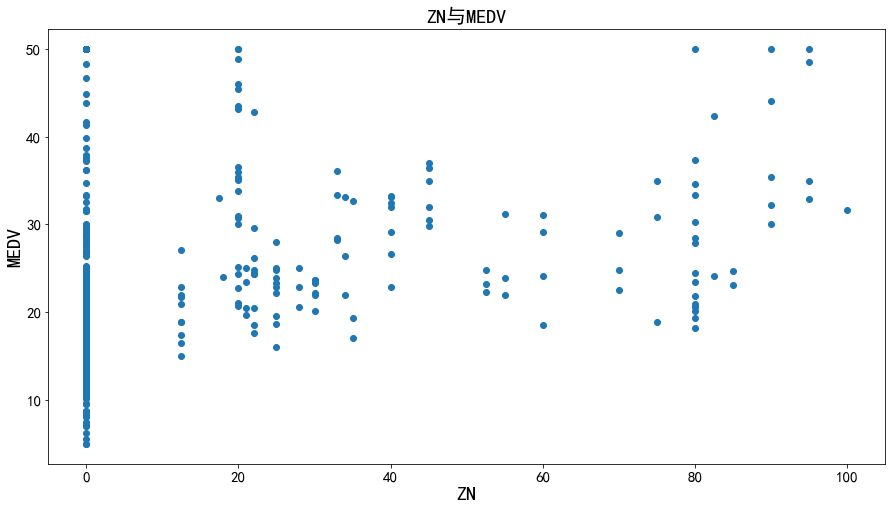

In [42]:
#住宅用地所占比例与房价的相关性
plt.scatter(df['ZN'],y,)
plt.title('ZN与MEDV',size=20)
plt.xlabel('ZN',size=20)
plt.ylabel('MEDV',size=20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

_分析：由图可知，房价不随大于25,000平方英尺的地块的住宅用地比例增大而增大或减少，在住在用地占比低的地方房价高到低均有分布，故相关性较弱_

**下面是该特征量的对房价预测值**

iteration:0  /  均方误差:0.584761
iteration:1  /  均方误差:0.393066
iteration:2  /  均方误差:0.271497
iteration:3  /  均方误差:0.194323
iteration:4  /  均方误差:0.145257
iteration:5  /  均方误差:0.113988
iteration:6  /  均方误差:0.093989
iteration:7  /  均方误差:0.081131
iteration:8  /  均方误差:0.072796
iteration:9  /  均方误差:0.067331
iteration:10  /  均方误差:0.063686
iteration:11  /  均方误差:0.061198
iteration:12  /  均方误差:0.059447
iteration:13  /  均方误差:0.058167
iteration:14  /  均方误差:0.057190
iteration:15  /  均方误差:0.056408
iteration:16  /  均方误差:0.055754
iteration:17  /  均方误差:0.055185
iteration:18  /  均方误差:0.054673
iteration:19  /  均方误差:0.054202
iteration:20  /  均方误差:0.053760
iteration:21  /  均方误差:0.053339
iteration:22  /  均方误差:0.052937
iteration:23  /  均方误差:0.052549
iteration:24  /  均方误差:0.052173
iteration:25  /  均方误差:0.051809
iteration:26  /  均方误差:0.051454
iteration:27  /  均方误差:0.051110
iteration:28  /  均方误差:0.050774
iteration:29  /  均方误差:0.050447
iteration:30  /  均方误差:0.050128
iteration:31  /  均方误差:0.049818
iteration:32  /  均

iteration:570  /  均方误差:0.037706
iteration:571  /  均方误差:0.037706
iteration:572  /  均方误差:0.037706
iteration:573  /  均方误差:0.037706
iteration:574  /  均方误差:0.037706
iteration:575  /  均方误差:0.037706
iteration:576  /  均方误差:0.037706
iteration:577  /  均方误差:0.037706
iteration:578  /  均方误差:0.037706
iteration:579  /  均方误差:0.037706
iteration:580  /  均方误差:0.037706
iteration:581  /  均方误差:0.037706
iteration:582  /  均方误差:0.037706
iteration:583  /  均方误差:0.037706
iteration:584  /  均方误差:0.037706
iteration:585  /  均方误差:0.037706
iteration:586  /  均方误差:0.037706
iteration:587  /  均方误差:0.037706
iteration:588  /  均方误差:0.037706
iteration:589  /  均方误差:0.037706
iteration:590  /  均方误差:0.037706
iteration:591  /  均方误差:0.037706
iteration:592  /  均方误差:0.037706
iteration:593  /  均方误差:0.037706
iteration:594  /  均方误差:0.037706
iteration:595  /  均方误差:0.037706
iteration:596  /  均方误差:0.037706
iteration:597  /  均方误差:0.037706
iteration:598  /  均方误差:0.037706
iteration:599  /  均方误差:0.037706
iteration:600  /  均方误差:0.037706
iteratio

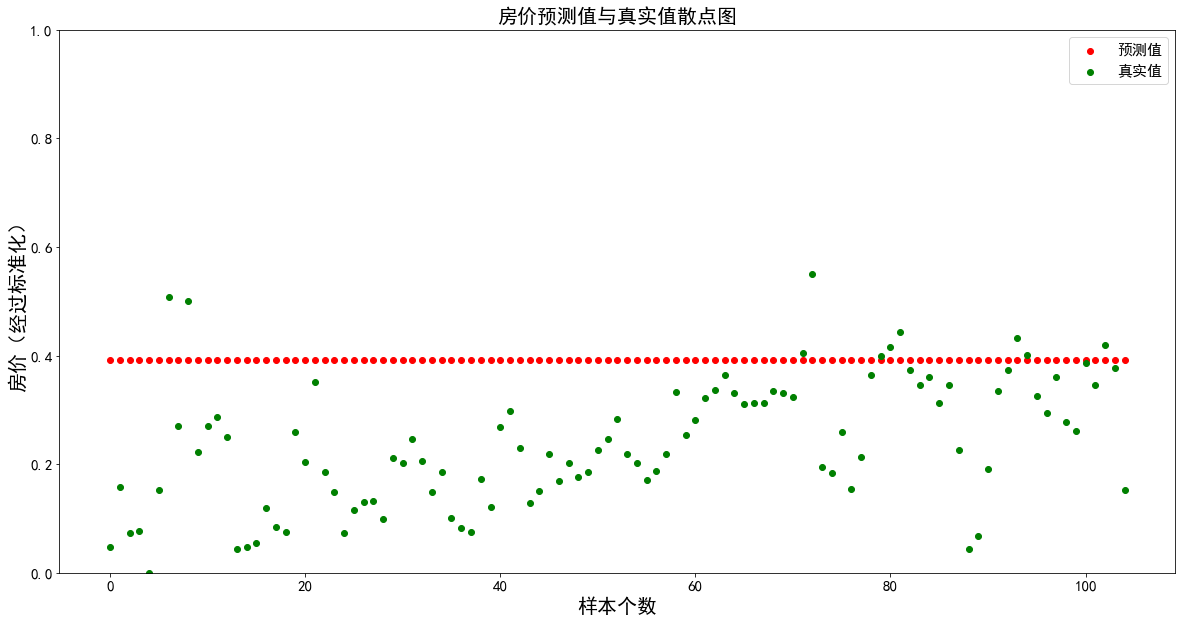

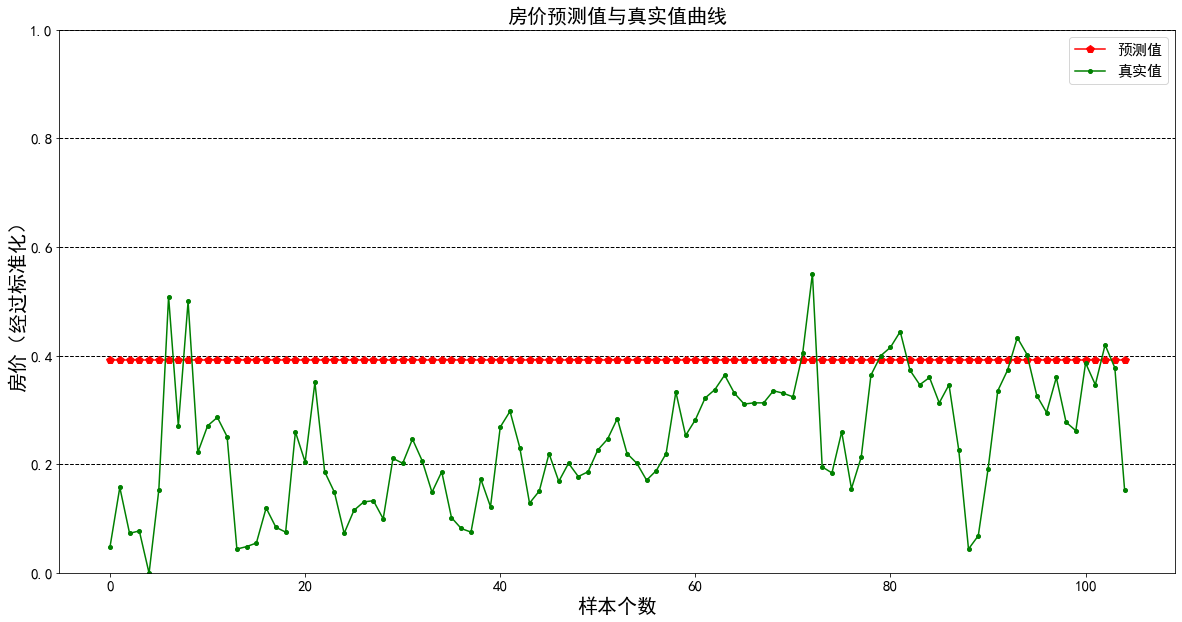

In [43]:
a1=LingerRegression_boston()              #ZN特征量对房价的预测
a1.separate([1], 1)
a1.gradient_descent()
a1.drawScatter()
a1.drawPlot()

***
***

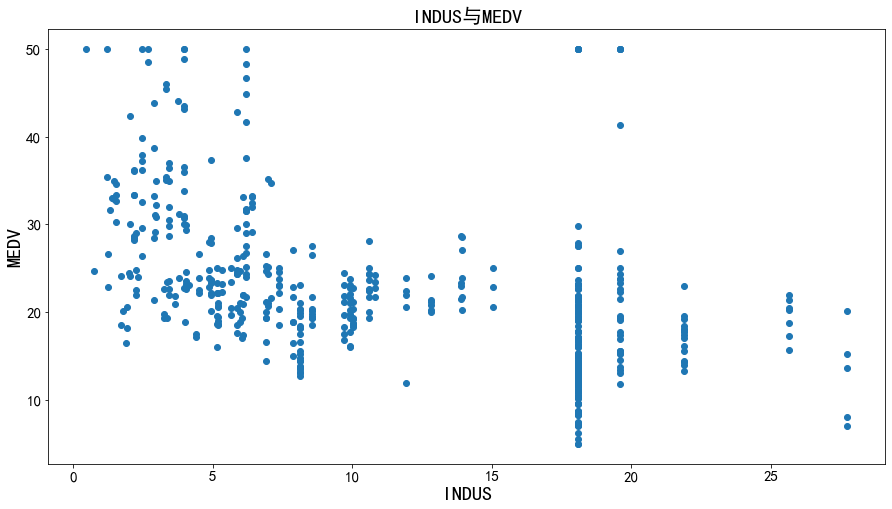

In [44]:
#城镇中非商业用地所占比例与房价的相关性
plt.scatter(df['INDUS'],y)
plt.title('INDUS与MEDV',size=20)
plt.xlabel('INDUS',size=20)
plt.ylabel('MEDV',size=20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

_分析：由图可知，房价随每个镇的非零售业务英亩的比例增大而总趋势减少，可以从放大的散点图中看出大致为一条斜率为负的直线，故相关性较上诉特征量较强_

**下面是对该特征房价的预测值**

iteration:0  /  均方误差:0.946377
iteration:1  /  均方误差:0.608917
iteration:2  /  均方误差:0.404621
iteration:3  /  均方误差:0.280767
iteration:4  /  均方误差:0.205507
iteration:5  /  均方误差:0.159608
iteration:6  /  均方误差:0.131452
iteration:7  /  均方误差:0.114020
iteration:8  /  均方误差:0.103076
iteration:9  /  均方误差:0.096057
iteration:10  /  均方误差:0.091419
iteration:11  /  均方误差:0.088226
iteration:12  /  均方误差:0.085914
iteration:13  /  均方误差:0.084142
iteration:14  /  均方误差:0.082704
iteration:15  /  均方误差:0.081474
iteration:16  /  均方误差:0.080379
iteration:17  /  均方误差:0.079371
iteration:18  /  均方误差:0.078424
iteration:19  /  均方误差:0.077519
iteration:20  /  均方误差:0.076648
iteration:21  /  均方误差:0.075803
iteration:22  /  均方误差:0.074980
iteration:23  /  均方误差:0.074178
iteration:24  /  均方误差:0.073393
iteration:25  /  均方误差:0.072626
iteration:26  /  均方误差:0.071875
iteration:27  /  均方误差:0.071139
iteration:28  /  均方误差:0.070419
iteration:29  /  均方误差:0.069714
iteration:30  /  均方误差:0.069023
iteration:31  /  均方误差:0.068347
iteration:32  /  均

iteration:589  /  均方误差:0.035757
iteration:590  /  均方误差:0.035757
iteration:591  /  均方误差:0.035757
iteration:592  /  均方误差:0.035757
iteration:593  /  均方误差:0.035757
iteration:594  /  均方误差:0.035757
iteration:595  /  均方误差:0.035757
iteration:596  /  均方误差:0.035756
iteration:597  /  均方误差:0.035756
iteration:598  /  均方误差:0.035756
iteration:599  /  均方误差:0.035756
iteration:600  /  均方误差:0.035756
iteration:601  /  均方误差:0.035756
iteration:602  /  均方误差:0.035756
iteration:603  /  均方误差:0.035756
iteration:604  /  均方误差:0.035756
iteration:605  /  均方误差:0.035756
iteration:606  /  均方误差:0.035756
iteration:607  /  均方误差:0.035756
iteration:608  /  均方误差:0.035756
iteration:609  /  均方误差:0.035756
iteration:610  /  均方误差:0.035756
iteration:611  /  均方误差:0.035756
iteration:612  /  均方误差:0.035756
iteration:613  /  均方误差:0.035756
iteration:614  /  均方误差:0.035756
iteration:615  /  均方误差:0.035756
iteration:616  /  均方误差:0.035756
iteration:617  /  均方误差:0.035756
iteration:618  /  均方误差:0.035756
iteration:619  /  均方误差:0.035756
iteratio

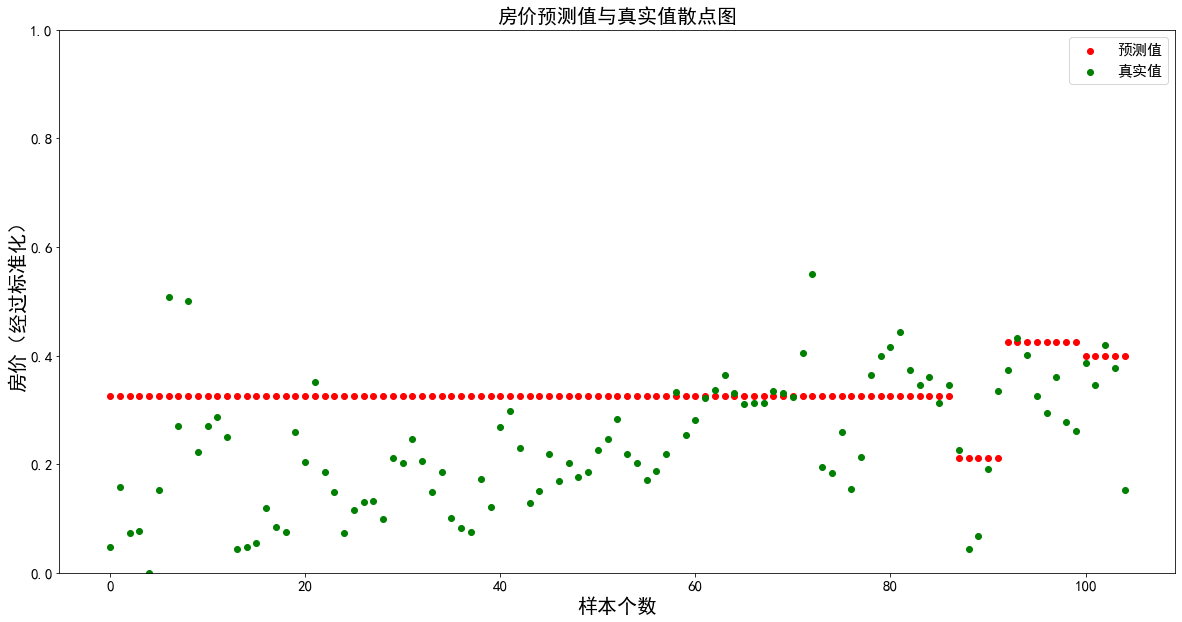

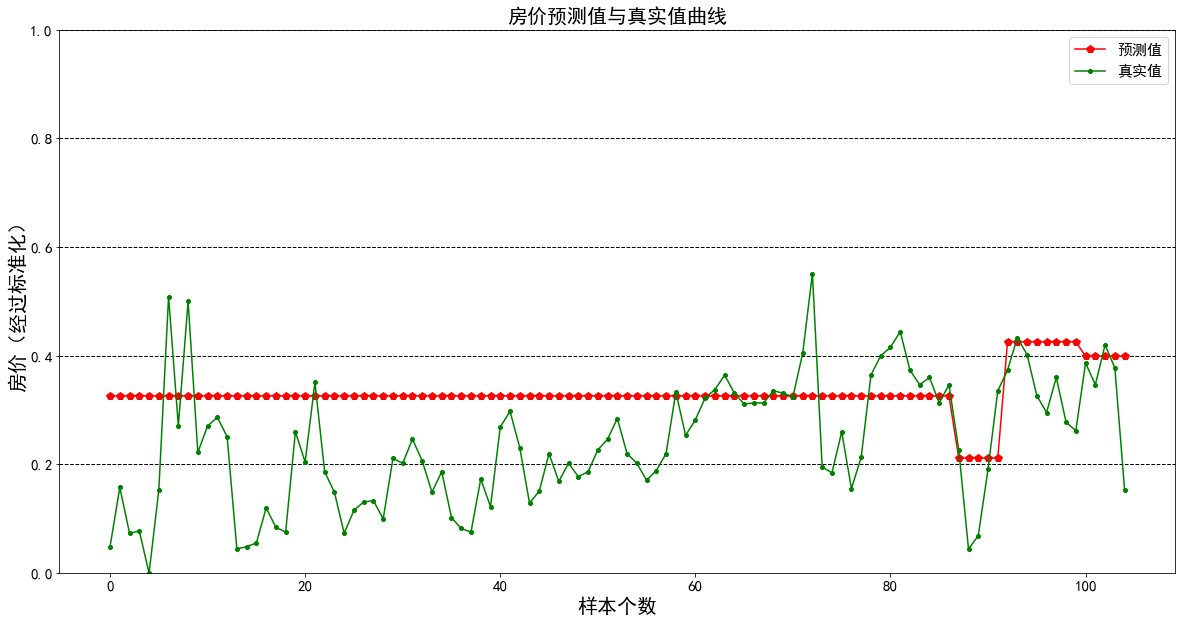

In [45]:
a2=LingerRegression_boston()             #INDUS特征量对房价的预测
a2.separate([2], 1)
a2.gradient_descent()
a2.drawScatter()
a2.drawPlot()

***
***

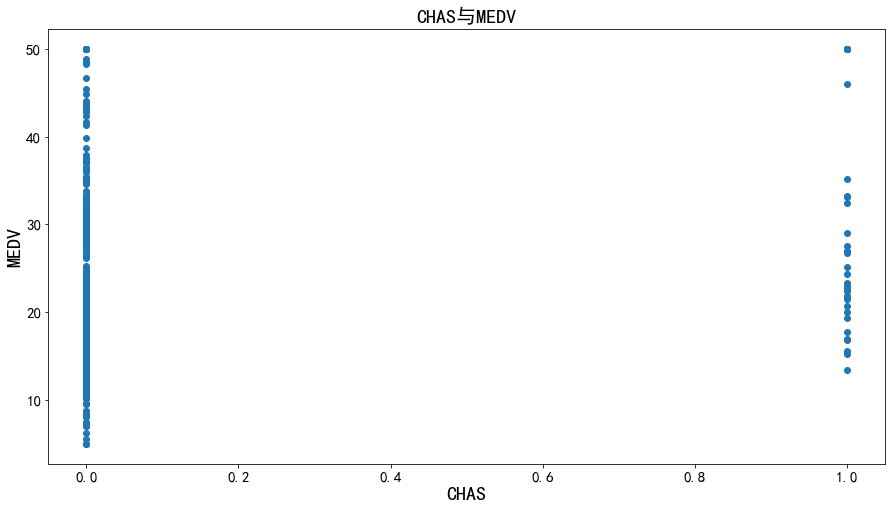

In [46]:
#是否处于查尔斯河边与房价的相关性
plt.scatter(df['CHAS'],y)
plt.title('CHAS与MEDV',size=20)
plt.xlabel('CHAS',size=20)
plt.ylabel('MEDV',size=20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

_分析：由图可知，不位于查尔斯河边时房价有高有低，位于查尔斯河边房价也是有高有低,故相关性弱_

**下面是对该特征对房价的预测值**

iteration:0  /  均方误差:0.539109
iteration:1  /  均方误差:0.376913
iteration:2  /  均方误差:0.272956
iteration:3  /  均方误差:0.206138
iteration:4  /  均方误差:0.163007
iteration:5  /  均方误差:0.134991
iteration:6  /  均方误差:0.116625
iteration:7  /  均方误差:0.104425
iteration:8  /  均方误差:0.096171
iteration:9  /  均方误差:0.090447
iteration:10  /  均方误差:0.086350
iteration:11  /  均方误差:0.083303
iteration:12  /  均方误差:0.080940
iteration:13  /  均方误差:0.079026
iteration:14  /  均方误差:0.077411
iteration:15  /  均方误差:0.075999
iteration:16  /  均方误差:0.074728
iteration:17  /  均方误差:0.073558
iteration:18  /  均方误差:0.072465
iteration:19  /  均方误差:0.071431
iteration:20  /  均方误差:0.070446
iteration:21  /  均方误差:0.069501
iteration:22  /  均方误差:0.068593
iteration:23  /  均方误差:0.067718
iteration:24  /  均方误差:0.066872
iteration:25  /  均方误差:0.066055
iteration:26  /  均方误差:0.065264
iteration:27  /  均方误差:0.064499
iteration:28  /  均方误差:0.063758
iteration:29  /  均方误差:0.063041
iteration:30  /  均方误差:0.062347
iteration:31  /  均方误差:0.061674
iteration:32  /  均

iteration:479  /  均方误差:0.040900
iteration:480  /  均方误差:0.040900
iteration:481  /  均方误差:0.040900
iteration:482  /  均方误差:0.040900
iteration:483  /  均方误差:0.040900
iteration:484  /  均方误差:0.040900
iteration:485  /  均方误差:0.040900
iteration:486  /  均方误差:0.040900
iteration:487  /  均方误差:0.040900
iteration:488  /  均方误差:0.040900
iteration:489  /  均方误差:0.040900
iteration:490  /  均方误差:0.040900
iteration:491  /  均方误差:0.040900
iteration:492  /  均方误差:0.040900
iteration:493  /  均方误差:0.040900
iteration:494  /  均方误差:0.040900
iteration:495  /  均方误差:0.040900
iteration:496  /  均方误差:0.040900
iteration:497  /  均方误差:0.040900
iteration:498  /  均方误差:0.040900
iteration:499  /  均方误差:0.040900
iteration:500  /  均方误差:0.040900
iteration:501  /  均方误差:0.040900
iteration:502  /  均方误差:0.040900
iteration:503  /  均方误差:0.040900
iteration:504  /  均方误差:0.040900
iteration:505  /  均方误差:0.040900
iteration:506  /  均方误差:0.040900
iteration:507  /  均方误差:0.040900
iteration:508  /  均方误差:0.040900
iteration:509  /  均方误差:0.040900
iteratio

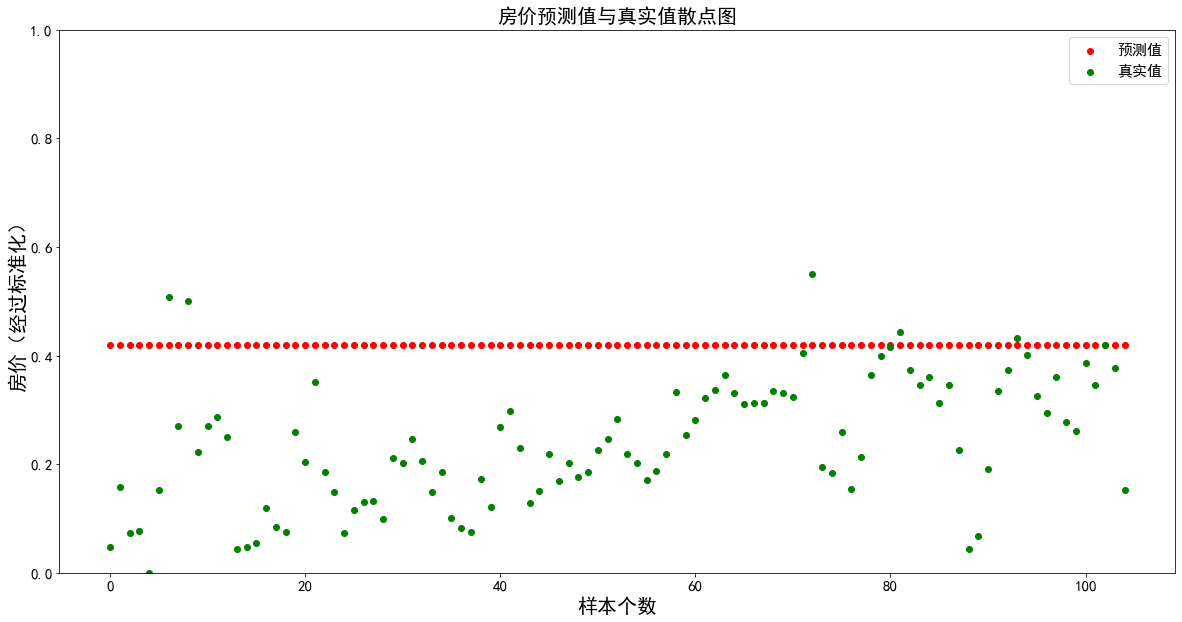

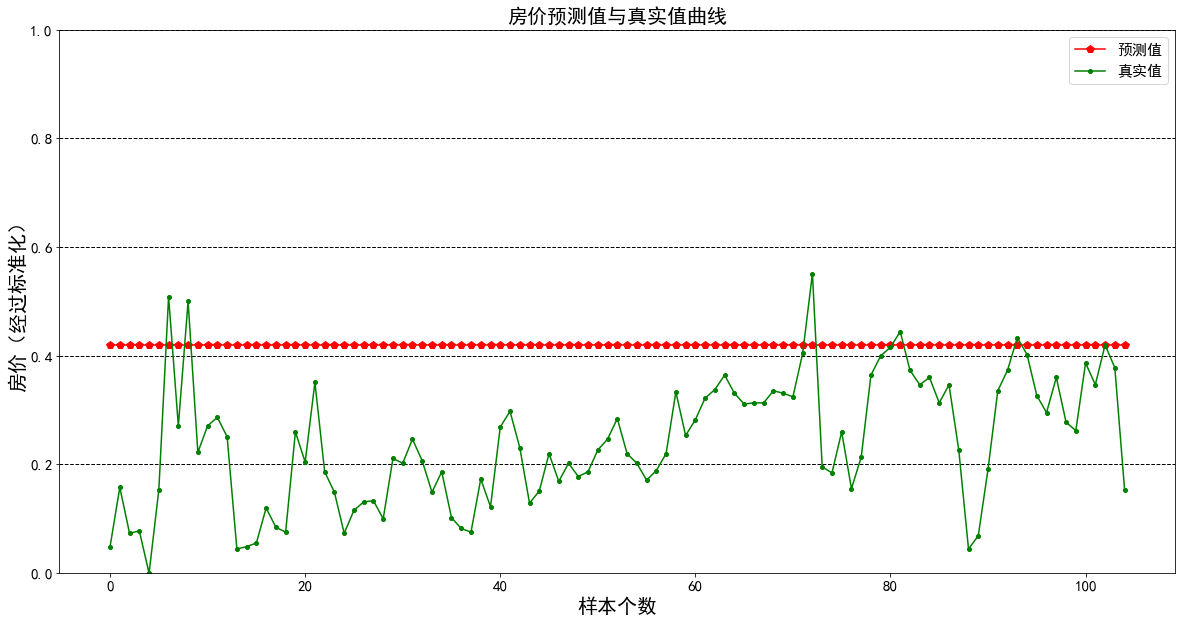

In [47]:
a3=LingerRegression_boston()               #CHAS特征量对房价的预测
a3.separate([3], 1)
a3.gradient_descent()
a3.drawScatter()
a3.drawPlot()

***
***

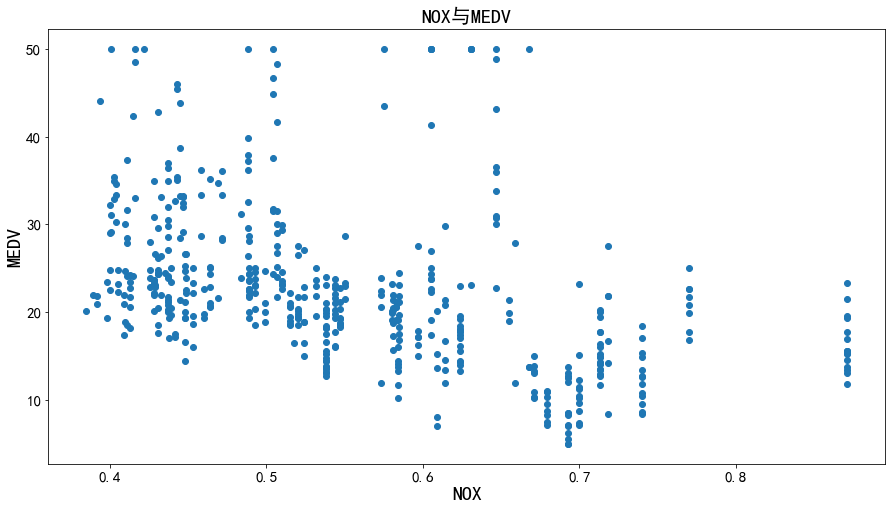

In [48]:
#一氧化氮浓度与房价的相关性     相关性强
plt.scatter(df['NOX'],y)
plt.title('NOX与MEDV',size=20)
plt.xlabel('NOX',size=20)
plt.ylabel('MEDV',size=20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

_分析：一氧化氮浓度高的地方房价较低，一氧化氮低的地方房价有高有低，但是还是有较大部分的点位于大致一条斜率为负的直线上，故为弱负相关性_

**下面是该特征对房价的预测值**

iteration:0  /  均方误差:0.884505
iteration:1  /  均方误差:0.575352
iteration:2  /  均方误差:0.386304
iteration:3  /  均方误差:0.270546
iteration:4  /  均方误差:0.199515
iteration:5  /  均方误差:0.155781
iteration:6  /  均方误差:0.128710
iteration:7  /  均方误差:0.111815
iteration:8  /  均方误差:0.101135
iteration:9  /  均方误差:0.094255
iteration:10  /  均方误差:0.089701
iteration:11  /  均方误差:0.086573
iteration:12  /  均方误差:0.084323
iteration:13  /  均方误差:0.082614
iteration:14  /  均方误差:0.081243
iteration:15  /  均方误差:0.080084
iteration:16  /  均方误差:0.079061
iteration:17  /  均方误差:0.078128
iteration:18  /  均方误差:0.077255
iteration:19  /  均方误差:0.076426
iteration:20  /  均方误差:0.075628
iteration:21  /  均方误差:0.074857
iteration:22  /  均方误差:0.074106
iteration:23  /  均方误差:0.073374
iteration:24  /  均方误差:0.072659
iteration:25  /  均方误差:0.071959
iteration:26  /  均方误差:0.071274
iteration:27  /  均方误差:0.070603
iteration:28  /  均方误差:0.069946
iteration:29  /  均方误差:0.069303
iteration:30  /  均方误差:0.068672
iteration:31  /  均方误差:0.068054
iteration:32  /  均

iteration:590  /  均方误差:0.037750
iteration:591  /  均方误差:0.037750
iteration:592  /  均方误差:0.037750
iteration:593  /  均方误差:0.037750
iteration:594  /  均方误差:0.037750
iteration:595  /  均方误差:0.037750
iteration:596  /  均方误差:0.037750
iteration:597  /  均方误差:0.037750
iteration:598  /  均方误差:0.037750
iteration:599  /  均方误差:0.037750
iteration:600  /  均方误差:0.037750
iteration:601  /  均方误差:0.037750
iteration:602  /  均方误差:0.037750
iteration:603  /  均方误差:0.037750
iteration:604  /  均方误差:0.037750
iteration:605  /  均方误差:0.037750
iteration:606  /  均方误差:0.037750
iteration:607  /  均方误差:0.037750
iteration:608  /  均方误差:0.037750
iteration:609  /  均方误差:0.037750
iteration:610  /  均方误差:0.037750
iteration:611  /  均方误差:0.037750
iteration:612  /  均方误差:0.037750
iteration:613  /  均方误差:0.037750
iteration:614  /  均方误差:0.037750
iteration:615  /  均方误差:0.037750
iteration:616  /  均方误差:0.037750
iteration:617  /  均方误差:0.037750
iteration:618  /  均方误差:0.037750
iteration:619  /  均方误差:0.037750
iteration:620  /  均方误差:0.037750
iteratio

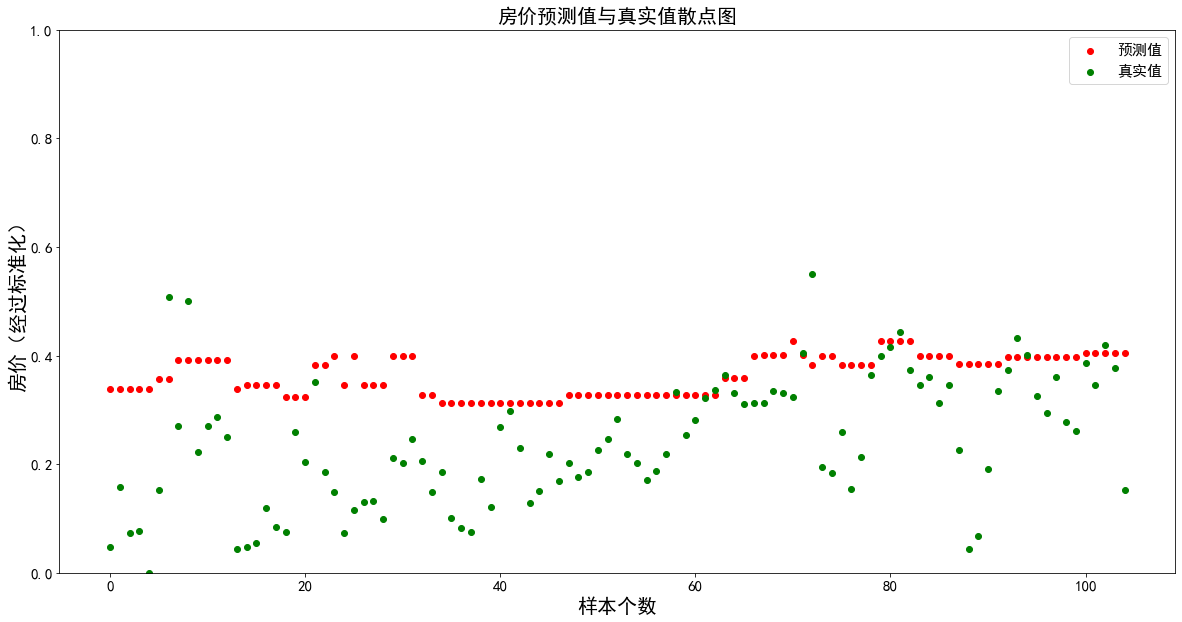

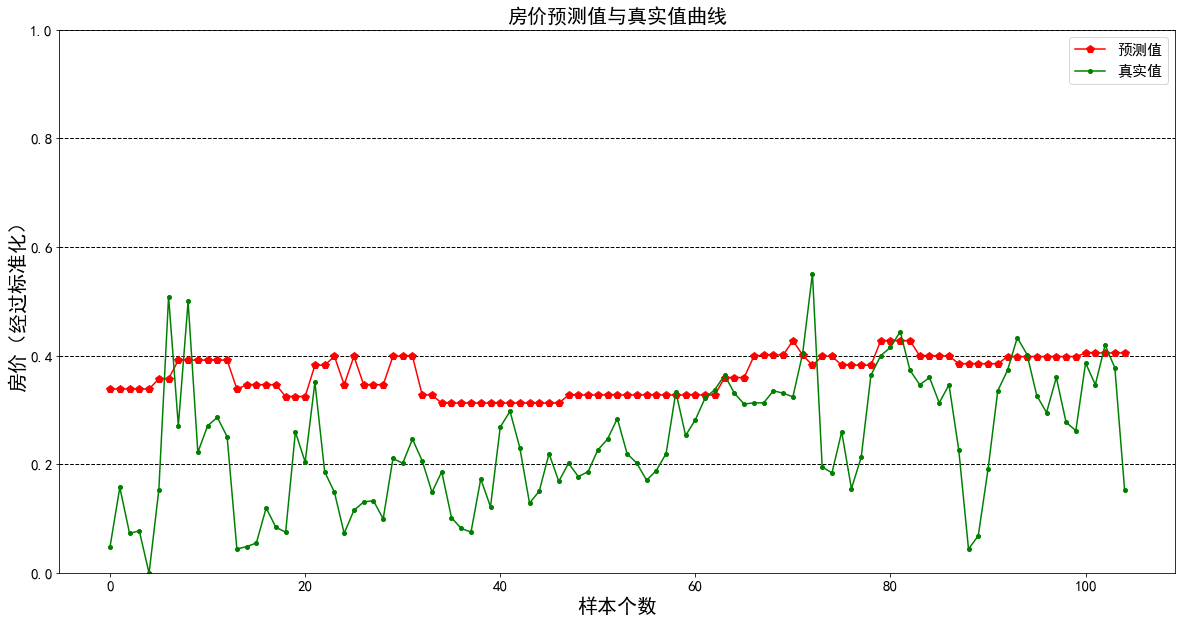

In [49]:
a4=LingerRegression_boston()             #NOX特征量对房价的预测
a4.separate([4], 1)
a4.gradient_descent()
a4.drawScatter()
a4.drawPlot()

***
***

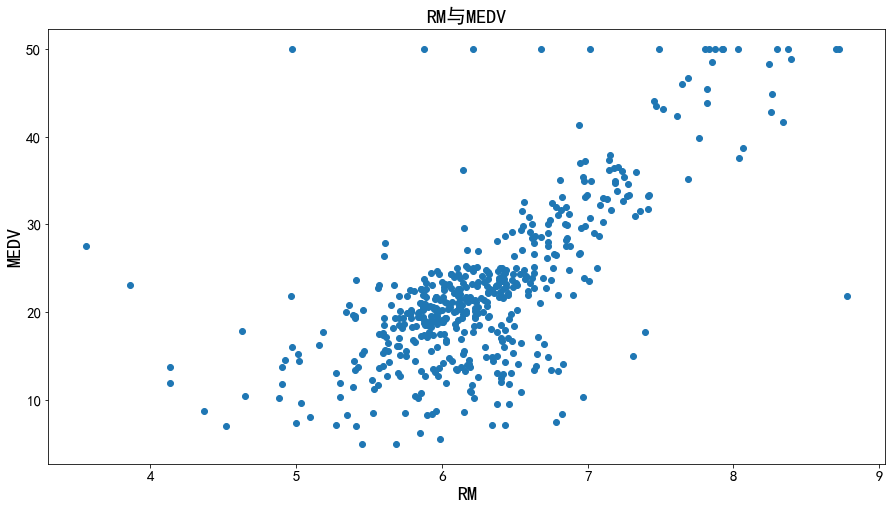

In [50]:
#住宅房间数与房价的相关性   相关性强
plt.scatter(df['RM'],y)
plt.title('RM与MEDV',size=20)
plt.xlabel('RM',size=20)
plt.ylabel('MEDV',size=20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

_分析：房价较明显的随住宅房间数增大而增大，故为正相关_

**下面是该特征对房价的预测值**

iteration:0  /  均方误差:1.234895
iteration:1  /  均方误差:0.691836
iteration:2  /  均方误差:0.392344
iteration:3  /  均方误差:0.227168
iteration:4  /  均方误差:0.136064
iteration:5  /  均方误差:0.085808
iteration:6  /  均方误差:0.058077
iteration:7  /  均方误差:0.042769
iteration:8  /  均方误差:0.034311
iteration:9  /  均方误差:0.029631
iteration:10  /  均方误差:0.027035
iteration:11  /  均方误差:0.025587
iteration:12  /  均方误差:0.024774
iteration:13  /  均方误差:0.024310
iteration:14  /  均方误差:0.024039
iteration:15  /  均方误差:0.023874
iteration:16  /  均方误差:0.023768
iteration:17  /  均方误差:0.023695
iteration:18  /  均方误差:0.023639
iteration:19  /  均方误差:0.023594
iteration:20  /  均方误差:0.023555
iteration:21  /  均方误差:0.023518
iteration:22  /  均方误差:0.023483
iteration:23  /  均方误差:0.023450
iteration:24  /  均方误差:0.023417
iteration:25  /  均方误差:0.023385
iteration:26  /  均方误差:0.023353
iteration:27  /  均方误差:0.023321
iteration:28  /  均方误差:0.023290
iteration:29  /  均方误差:0.023258
iteration:30  /  均方误差:0.023227
iteration:31  /  均方误差:0.023196
iteration:32  /  均

iteration:657  /  均方误差:0.018284
iteration:658  /  均方误差:0.018284
iteration:659  /  均方误差:0.018283
iteration:660  /  均方误差:0.018282
iteration:661  /  均方误差:0.018282
iteration:662  /  均方误差:0.018281
iteration:663  /  均方误差:0.018281
iteration:664  /  均方误差:0.018280
iteration:665  /  均方误差:0.018279
iteration:666  /  均方误差:0.018279
iteration:667  /  均方误差:0.018278
iteration:668  /  均方误差:0.018277
iteration:669  /  均方误差:0.018277
iteration:670  /  均方误差:0.018276
iteration:671  /  均方误差:0.018276
iteration:672  /  均方误差:0.018275
iteration:673  /  均方误差:0.018274
iteration:674  /  均方误差:0.018274
iteration:675  /  均方误差:0.018273
iteration:676  /  均方误差:0.018273
iteration:677  /  均方误差:0.018272
iteration:678  /  均方误差:0.018271
iteration:679  /  均方误差:0.018271
iteration:680  /  均方误差:0.018270
iteration:681  /  均方误差:0.018270
iteration:682  /  均方误差:0.018269
iteration:683  /  均方误差:0.018268
iteration:684  /  均方误差:0.018268
iteration:685  /  均方误差:0.018267
iteration:686  /  均方误差:0.018267
iteration:687  /  均方误差:0.018266
iteratio

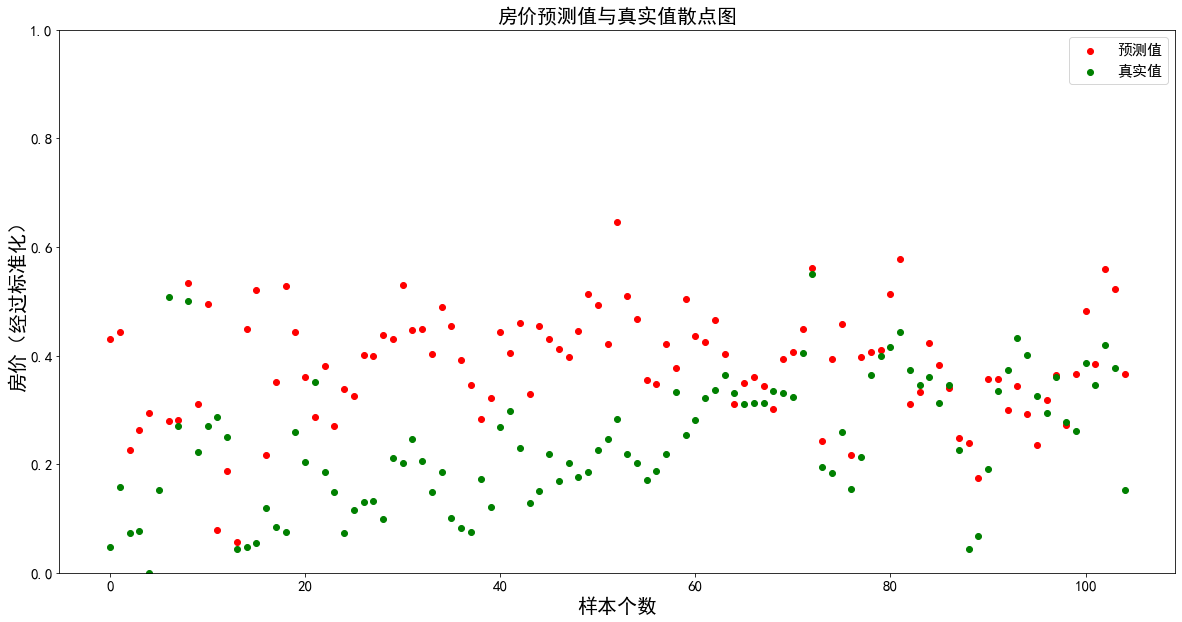

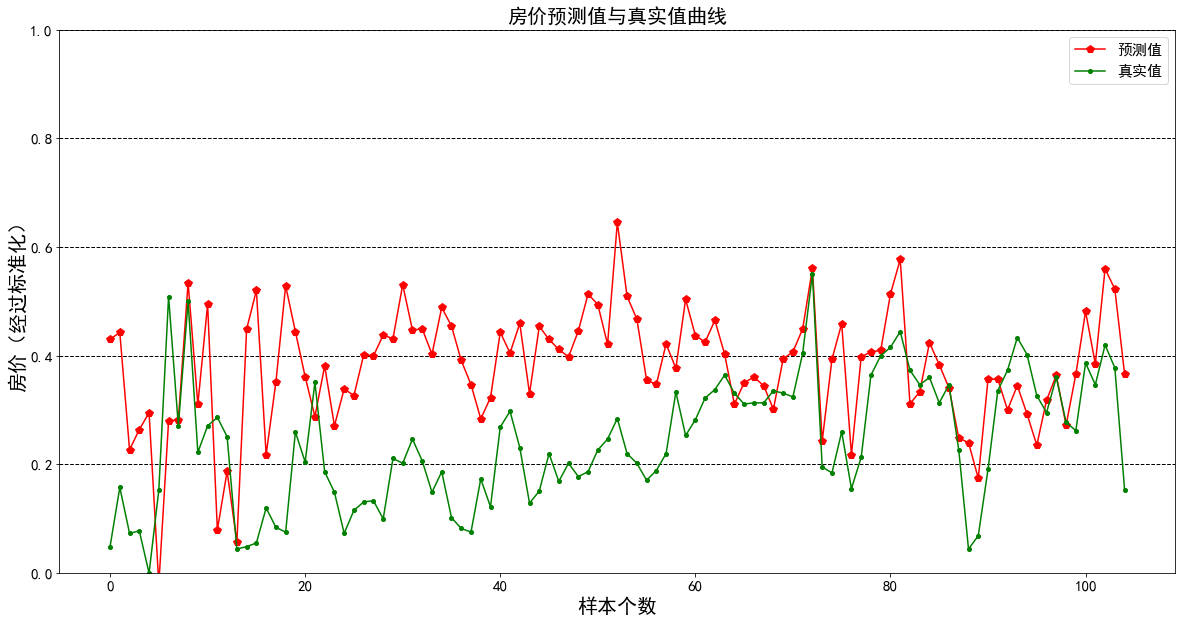

In [51]:
a5=LingerRegression_boston()                     #RM特征量对房价的预测
a5.separate([5], 1)
a5.gradient_descent()
a5.drawScatter()
a5.drawPlot()

***
***

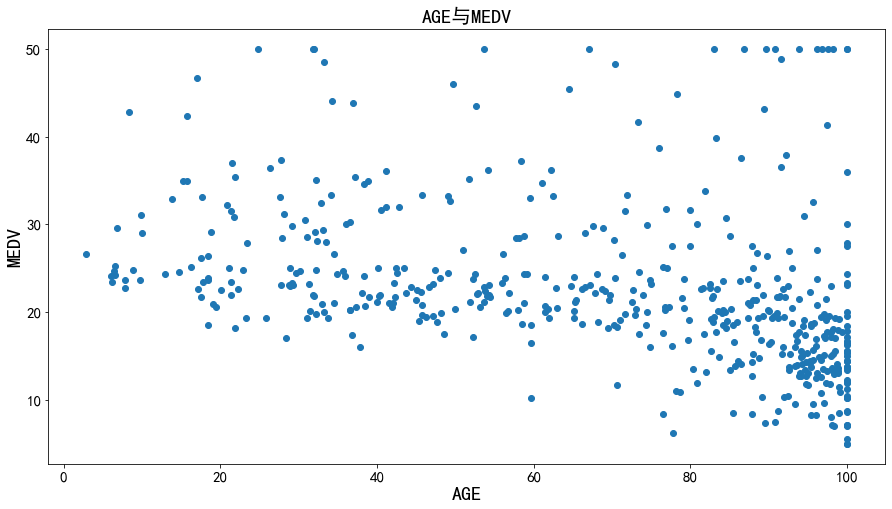

In [52]:
#1940年以前建成的业主自住单位的占比与房价的相关性 相关性强
plt.scatter(df['AGE'],y)
plt.title('AGE与MEDV',size=20)
plt.xlabel('AGE',size=20)
plt.ylabel('MEDV',size=20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

_分析：1940年以前建成的业主自住单位的占比高和低的地方房价均有高有低，故相关性不强_

**下面是该特征对房价的预测值**

iteration:0  /  均方误差:1.610934
iteration:1  /  均方误差:0.858272
iteration:2  /  均方误差:0.473038
iteration:3  /  均方误差:0.275682
iteration:4  /  均方误差:0.174400
iteration:5  /  均方误差:0.122248
iteration:6  /  均方误差:0.095227
iteration:7  /  均方误差:0.081065
iteration:8  /  均方误差:0.073485
iteration:9  /  均方误差:0.069279
iteration:10  /  均方误差:0.066808
iteration:11  /  均方误差:0.065230
iteration:12  /  均方误差:0.064118
iteration:13  /  均方误差:0.063251
iteration:14  /  均方误差:0.062516
iteration:15  /  均方误差:0.061857
iteration:16  /  均方误差:0.061244
iteration:17  /  均方误差:0.060661
iteration:18  /  均方误差:0.060099
iteration:19  /  均方误差:0.059556
iteration:20  /  均方误差:0.059028
iteration:21  /  均方误差:0.058514
iteration:22  /  均方误差:0.058013
iteration:23  /  均方误差:0.057526
iteration:24  /  均方误差:0.057050
iteration:25  /  均方误差:0.056586
iteration:26  /  均方误差:0.056134
iteration:27  /  均方误差:0.055693
iteration:28  /  均方误差:0.055263
iteration:29  /  均方误差:0.054844
iteration:30  /  均方误差:0.054435
iteration:31  /  均方误差:0.054036
iteration:32  /  均

iteration:529  /  均方误差:0.038386
iteration:530  /  均方误差:0.038386
iteration:531  /  均方误差:0.038386
iteration:532  /  均方误差:0.038386
iteration:533  /  均方误差:0.038386
iteration:534  /  均方误差:0.038386
iteration:535  /  均方误差:0.038386
iteration:536  /  均方误差:0.038386
iteration:537  /  均方误差:0.038386
iteration:538  /  均方误差:0.038386
iteration:539  /  均方误差:0.038386
iteration:540  /  均方误差:0.038386
iteration:541  /  均方误差:0.038386
iteration:542  /  均方误差:0.038386
iteration:543  /  均方误差:0.038386
iteration:544  /  均方误差:0.038386
iteration:545  /  均方误差:0.038386
iteration:546  /  均方误差:0.038386
iteration:547  /  均方误差:0.038386
iteration:548  /  均方误差:0.038386
iteration:549  /  均方误差:0.038386
iteration:550  /  均方误差:0.038386
iteration:551  /  均方误差:0.038386
iteration:552  /  均方误差:0.038386
iteration:553  /  均方误差:0.038386
iteration:554  /  均方误差:0.038386
iteration:555  /  均方误差:0.038386
iteration:556  /  均方误差:0.038386
iteration:557  /  均方误差:0.038386
iteration:558  /  均方误差:0.038386
iteration:559  /  均方误差:0.038386
iteratio

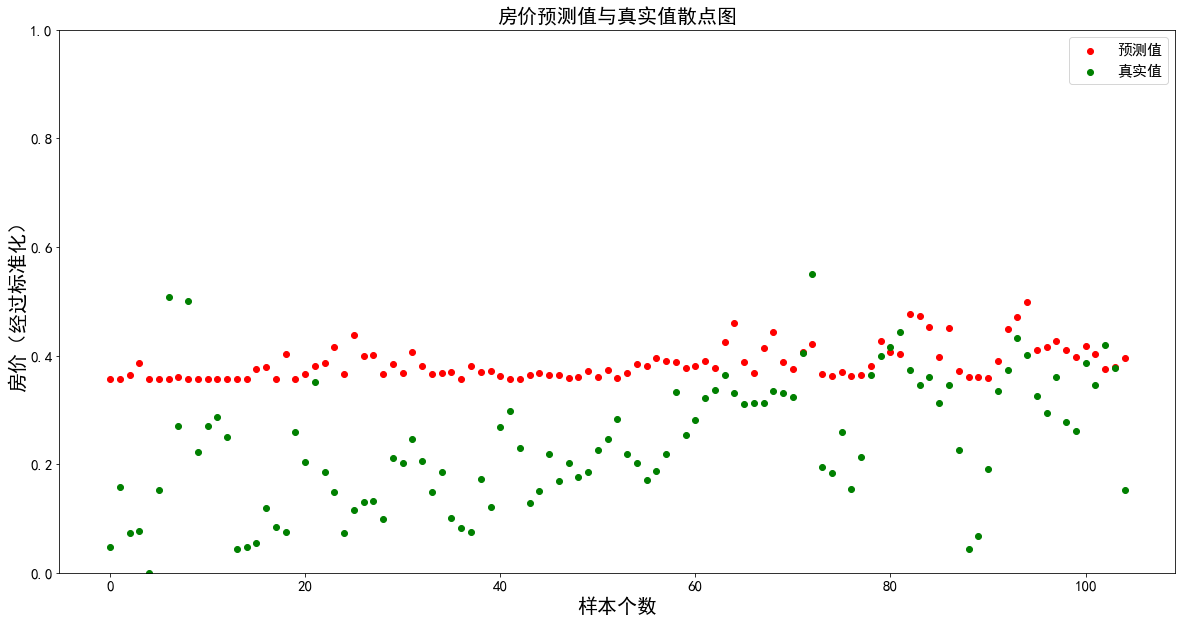

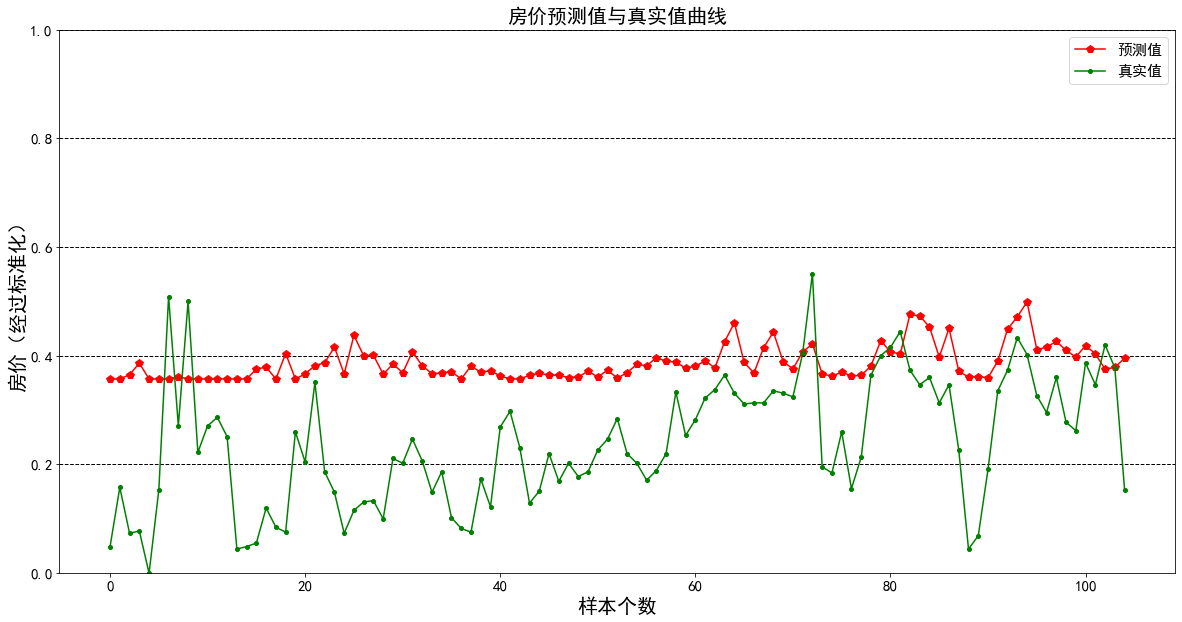

In [53]:
a6=LingerRegression_boston()             #AGE特征量对房价的预测
a6.separate([6], 1)
a6.gradient_descent()
a6.drawScatter()
a6.drawPlot()

***
***

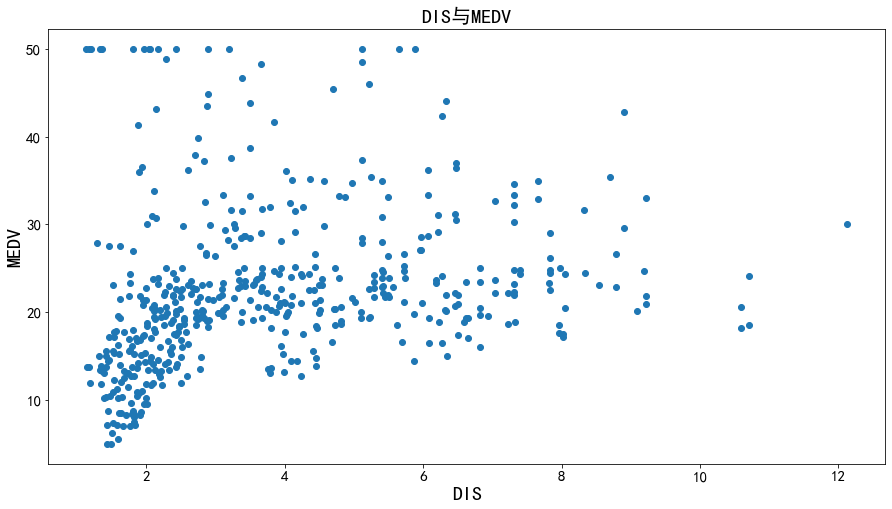

In [54]:
#距离波士顿5个商业中心的加权平均距离比与房价的相关性  相关性强
plt.scatter(df['DIS'],y)
plt.title('DIS与MEDV',size=20)
plt.xlabel('DIS',size=20)
plt.ylabel('MEDV',size=20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

_分析：由图可以看到，在距离波士顿5个商业中心的加权平均距离比增大的地方，房价的散点基本缺失，而在距离波士顿5个商业中心的加权平均距离比低的地方，房价有高有低，故相关性弱_

**下面是该特征对房价的预测值**

iteration:0  /  均方误差:0.793969
iteration:1  /  均方误差:0.509936
iteration:2  /  均方误差:0.335312
iteration:3  /  均方误差:0.227918
iteration:4  /  均方误差:0.161840
iteration:5  /  均方误差:0.121149
iteration:6  /  均方误差:0.096061
iteration:7  /  均方误差:0.080562
iteration:8  /  均方误差:0.070956
iteration:9  /  均方误差:0.064972
iteration:10  /  均方误差:0.061216
iteration:11  /  均方误差:0.058830
iteration:12  /  均方误差:0.057286
iteration:13  /  均方误差:0.056261
iteration:14  /  均方误差:0.055557
iteration:15  /  均方误差:0.055050
iteration:16  /  均方误差:0.054666
iteration:17  /  均方误差:0.054358
iteration:18  /  均方误差:0.054098
iteration:19  /  均方误差:0.053868
iteration:20  /  均方误差:0.053658
iteration:21  /  均方误差:0.053462
iteration:22  /  均方误差:0.053274
iteration:23  /  均方误差:0.053093
iteration:24  /  均方误差:0.052917
iteration:25  /  均方误差:0.052745
iteration:26  /  均方误差:0.052576
iteration:27  /  均方误差:0.052411
iteration:28  /  均方误差:0.052248
iteration:29  /  均方误差:0.052087
iteration:30  /  均方误差:0.051929
iteration:31  /  均方误差:0.051774
iteration:32  /  均

iteration:538  /  均方误差:0.041164
iteration:539  /  均方误差:0.041164
iteration:540  /  均方误差:0.041164
iteration:541  /  均方误差:0.041164
iteration:542  /  均方误差:0.041164
iteration:543  /  均方误差:0.041164
iteration:544  /  均方误差:0.041163
iteration:545  /  均方误差:0.041163
iteration:546  /  均方误差:0.041163
iteration:547  /  均方误差:0.041163
iteration:548  /  均方误差:0.041163
iteration:549  /  均方误差:0.041163
iteration:550  /  均方误差:0.041163
iteration:551  /  均方误差:0.041163
iteration:552  /  均方误差:0.041163
iteration:553  /  均方误差:0.041163
iteration:554  /  均方误差:0.041163
iteration:555  /  均方误差:0.041163
iteration:556  /  均方误差:0.041162
iteration:557  /  均方误差:0.041162
iteration:558  /  均方误差:0.041162
iteration:559  /  均方误差:0.041162
iteration:560  /  均方误差:0.041162
iteration:561  /  均方误差:0.041162
iteration:562  /  均方误差:0.041162
iteration:563  /  均方误差:0.041162
iteration:564  /  均方误差:0.041162
iteration:565  /  均方误差:0.041162
iteration:566  /  均方误差:0.041162
iteration:567  /  均方误差:0.041162
iteration:568  /  均方误差:0.041162
iteratio

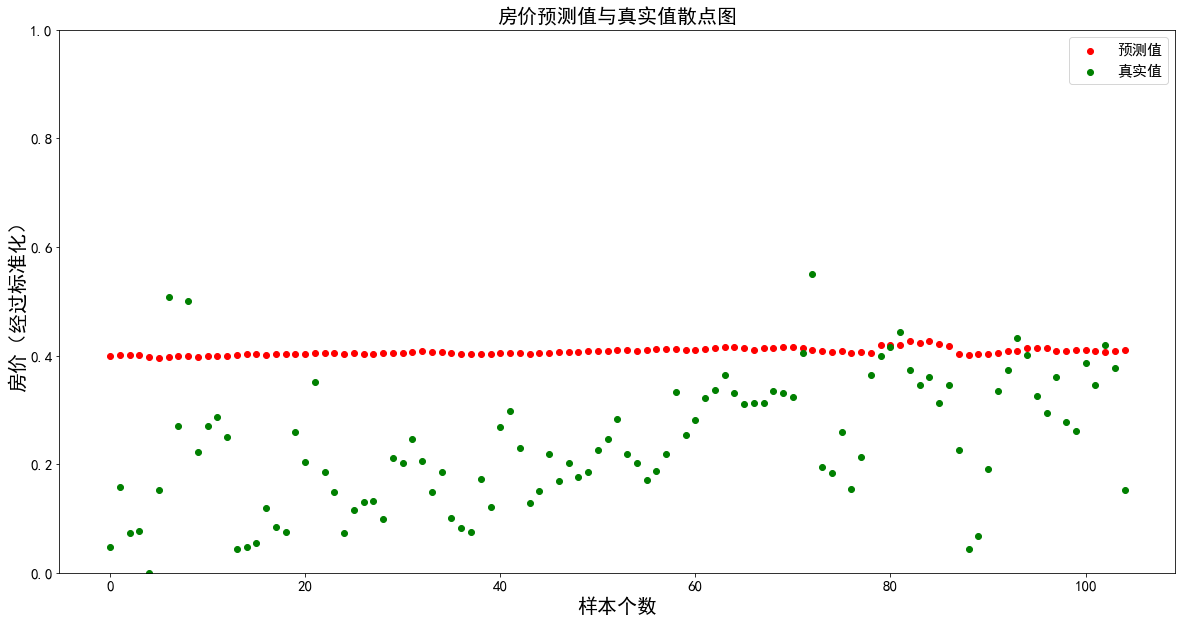

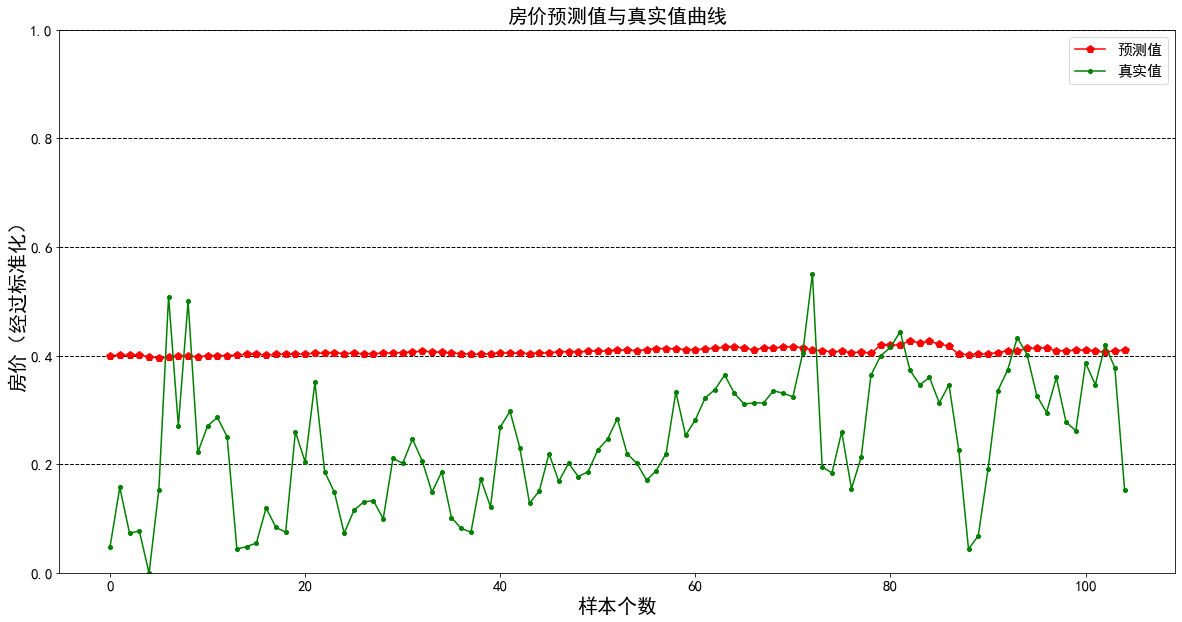

In [55]:
a7=LingerRegression_boston()                    #DIS特征量对房价的预测
a7.separate([7], 1)
a7.gradient_descent()
a7.drawScatter()
a7.drawPlot()

***
***

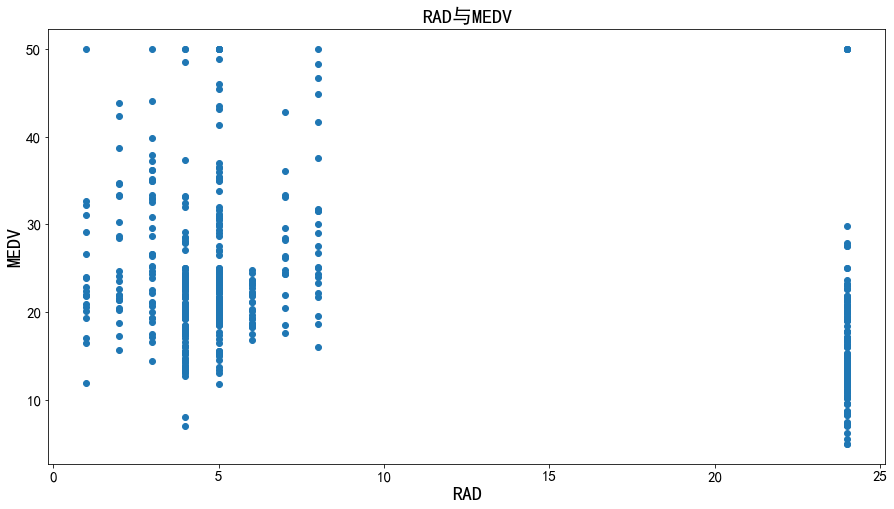

In [56]:
#距离高速公路的便利指数与房价的相关性
plt.scatter(df['RAD'],y)
plt.title('RAD与MEDV',size=20)
plt.xlabel('RAD',size=20)
plt.ylabel('MEDV',size=20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

_分析：由图看出，散点中间部分缺失，在距离高速公路的便利指数低的地方房价也又高有底，故相关性弱_

**下面是该特征对房价的预测值**

iteration:0  /  均方误差:0.809263
iteration:1  /  均方误差:0.540391
iteration:2  /  均方误差:0.373199
iteration:3  /  均方误差:0.268995
iteration:4  /  均方误差:0.203820
iteration:5  /  均方误差:0.162832
iteration:6  /  均方误差:0.136841
iteration:7  /  均方误差:0.120155
iteration:8  /  均方误差:0.109248
iteration:9  /  均方误差:0.101936
iteration:10  /  均方误差:0.096867
iteration:11  /  均方误差:0.093201
iteration:12  /  均方误差:0.090420
iteration:13  /  均方误差:0.088202
iteration:14  /  均方误差:0.086346
iteration:15  /  均方误差:0.084727
iteration:16  /  均方误差:0.083270
iteration:17  /  均方误差:0.081925
iteration:18  /  均方误差:0.080662
iteration:19  /  均方误差:0.079462
iteration:20  /  均方误差:0.078313
iteration:21  /  均方误差:0.077208
iteration:22  /  均方误差:0.076140
iteration:23  /  均方误差:0.075106
iteration:24  /  均方误差:0.074104
iteration:25  /  均方误差:0.073133
iteration:26  /  均方误差:0.072189
iteration:27  /  均方误差:0.071274
iteration:28  /  均方误差:0.070384
iteration:29  /  均方误差:0.069520
iteration:30  /  均方误差:0.068681
iteration:31  /  均方误差:0.067866
iteration:32  /  均

iteration:521  /  均方误差:0.039965
iteration:522  /  均方误差:0.039965
iteration:523  /  均方误差:0.039965
iteration:524  /  均方误差:0.039965
iteration:525  /  均方误差:0.039965
iteration:526  /  均方误差:0.039965
iteration:527  /  均方误差:0.039965
iteration:528  /  均方误差:0.039965
iteration:529  /  均方误差:0.039965
iteration:530  /  均方误差:0.039965
iteration:531  /  均方误差:0.039965
iteration:532  /  均方误差:0.039965
iteration:533  /  均方误差:0.039965
iteration:534  /  均方误差:0.039965
iteration:535  /  均方误差:0.039965
iteration:536  /  均方误差:0.039965
iteration:537  /  均方误差:0.039965
iteration:538  /  均方误差:0.039965
iteration:539  /  均方误差:0.039965
iteration:540  /  均方误差:0.039965
iteration:541  /  均方误差:0.039965
iteration:542  /  均方误差:0.039965
iteration:543  /  均方误差:0.039965
iteration:544  /  均方误差:0.039965
iteration:545  /  均方误差:0.039965
iteration:546  /  均方误差:0.039965
iteration:547  /  均方误差:0.039965
iteration:548  /  均方误差:0.039965
iteration:549  /  均方误差:0.039965
iteration:550  /  均方误差:0.039965
iteration:551  /  均方误差:0.039965
iteratio

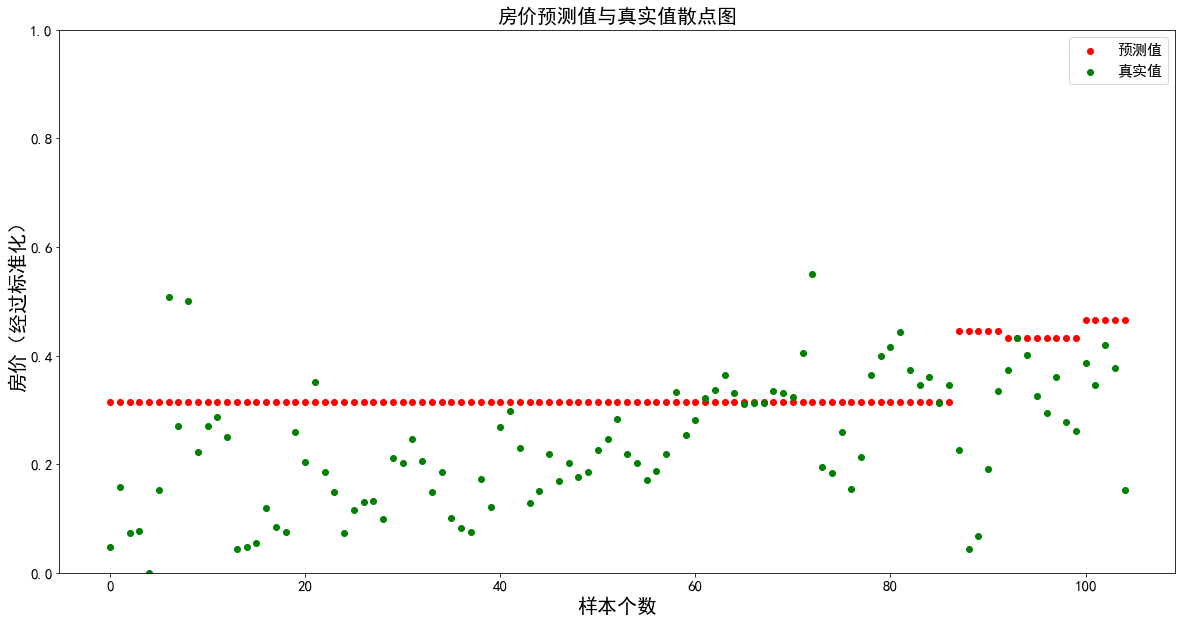

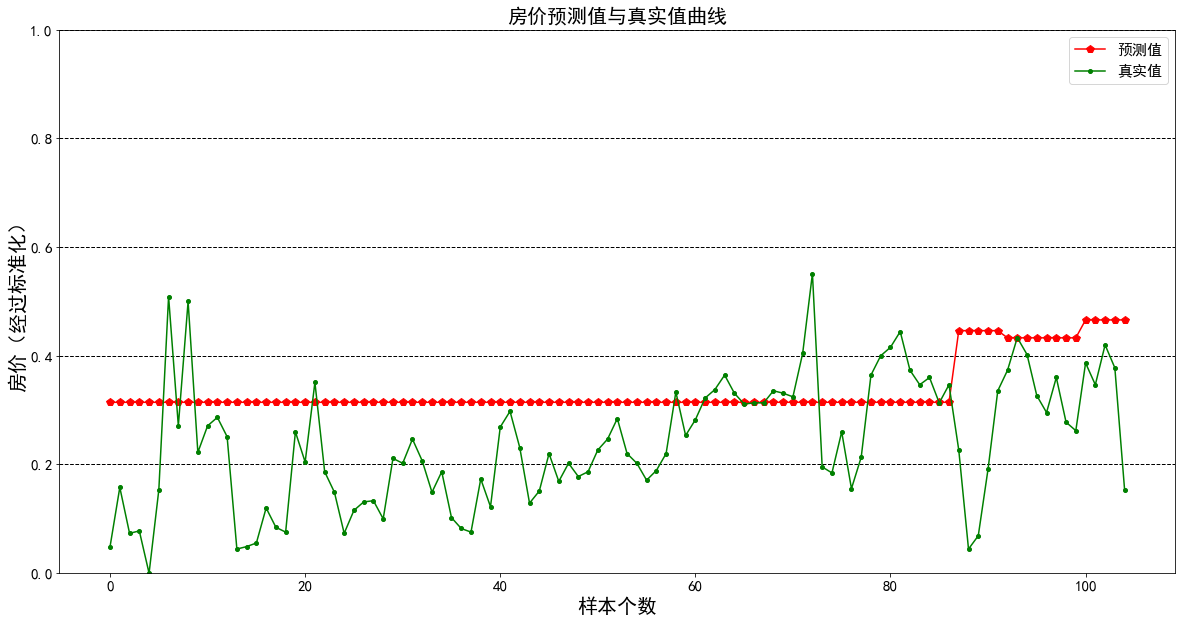

In [57]:
a8=LingerRegression_boston()                   #RAD特征量对房价的预测
a8.separate([8], 1)
a8.gradient_descent()
a8.drawScatter()
a8.drawPlot()

***
***


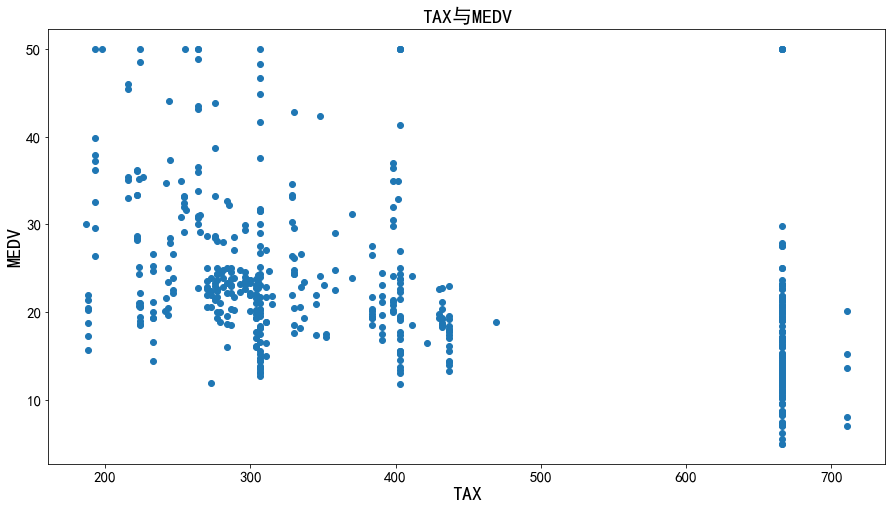

In [58]:
#不动产税率与房价的相关性
plt.scatter(df['TAX'],y)
plt.title('TAX与MEDV',size=20)
plt.xlabel('TAX',size=20)
plt.ylabel('MEDV',size=20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

_分析：由图可见，中部散点缺失，在不动产税率低的地方房价有高有低，故相关性弱_

**下面是该特征对房价的预测值**

iteration:0  /  均方误差:0.915159
iteration:1  /  均方误差:0.592983
iteration:2  /  均方误差:0.396794
iteration:3  /  均方误差:0.277144
iteration:4  /  均方误差:0.203996
iteration:5  /  均方误差:0.159106
iteration:6  /  均方误差:0.131390
iteration:7  /  均方误差:0.114117
iteration:8  /  均方误差:0.103195
iteration:9  /  均方误差:0.096142
iteration:10  /  均方误差:0.091447
iteration:11  /  均方误差:0.088194
iteration:12  /  均方误差:0.085826
iteration:13  /  均方误差:0.084003
iteration:14  /  均方误差:0.082521
iteration:15  /  均方误差:0.081253
iteration:16  /  均方误差:0.080123
iteration:17  /  均方误差:0.079086
iteration:18  /  均方误差:0.078112
iteration:19  /  均方误差:0.077184
iteration:20  /  均方误差:0.076292
iteration:21  /  均方误差:0.075428
iteration:22  /  均方误差:0.074589
iteration:23  /  均方误差:0.073772
iteration:24  /  均方误差:0.072974
iteration:25  /  均方误差:0.072195
iteration:26  /  均方误差:0.071434
iteration:27  /  均方误差:0.070690
iteration:28  /  均方误差:0.069963
iteration:29  /  均方误差:0.069251
iteration:30  /  均方误差:0.068556
iteration:31  /  均方误差:0.067875
iteration:32  /  均

iteration:566  /  均方误差:0.037453
iteration:567  /  均方误差:0.037453
iteration:568  /  均方误差:0.037453
iteration:569  /  均方误差:0.037453
iteration:570  /  均方误差:0.037453
iteration:571  /  均方误差:0.037453
iteration:572  /  均方误差:0.037453
iteration:573  /  均方误差:0.037453
iteration:574  /  均方误差:0.037453
iteration:575  /  均方误差:0.037453
iteration:576  /  均方误差:0.037453
iteration:577  /  均方误差:0.037453
iteration:578  /  均方误差:0.037453
iteration:579  /  均方误差:0.037453
iteration:580  /  均方误差:0.037453
iteration:581  /  均方误差:0.037453
iteration:582  /  均方误差:0.037453
iteration:583  /  均方误差:0.037453
iteration:584  /  均方误差:0.037453
iteration:585  /  均方误差:0.037453
iteration:586  /  均方误差:0.037453
iteration:587  /  均方误差:0.037452
iteration:588  /  均方误差:0.037452
iteration:589  /  均方误差:0.037452
iteration:590  /  均方误差:0.037452
iteration:591  /  均方误差:0.037452
iteration:592  /  均方误差:0.037452
iteration:593  /  均方误差:0.037452
iteration:594  /  均方误差:0.037452
iteration:595  /  均方误差:0.037452
iteration:596  /  均方误差:0.037452
iteratio

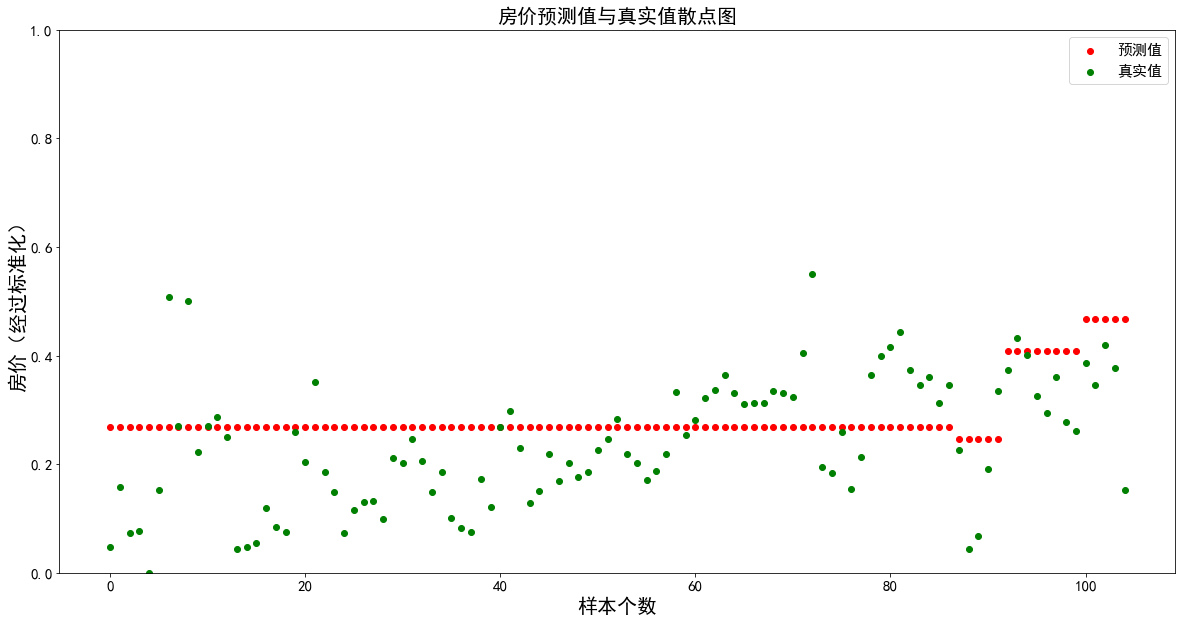

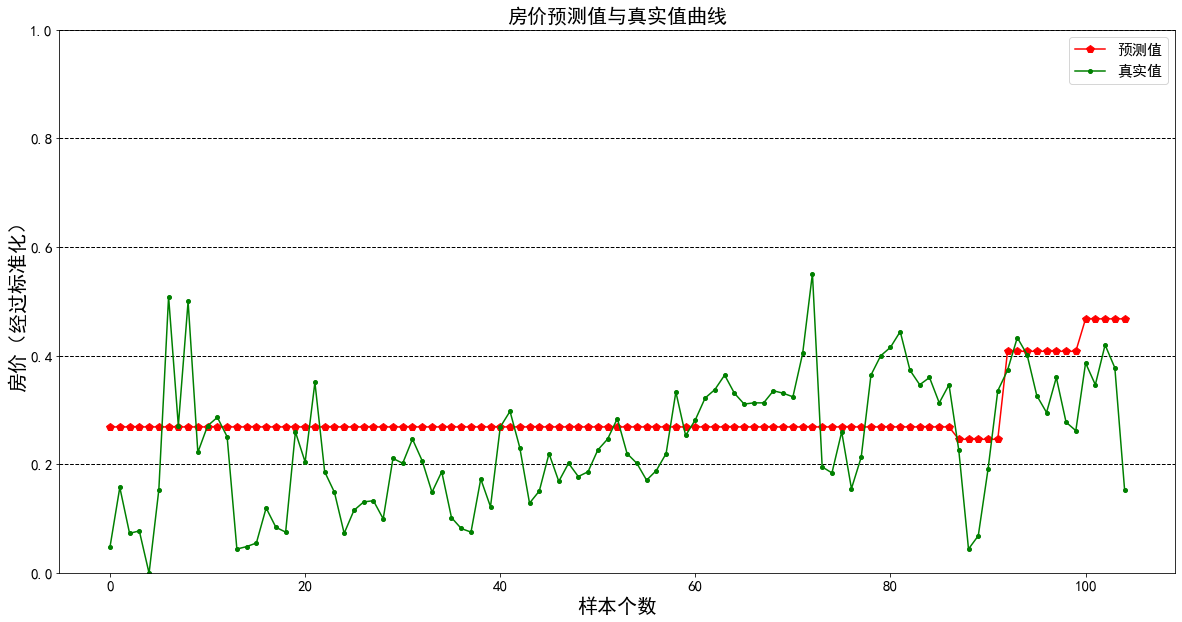

In [59]:
a9=LingerRegression_boston()                   #TAX特征量对房价的预测
a9.separate([9], 1)
a9.gradient_descent()
a9.drawScatter()
a9.drawPlot()

***
***


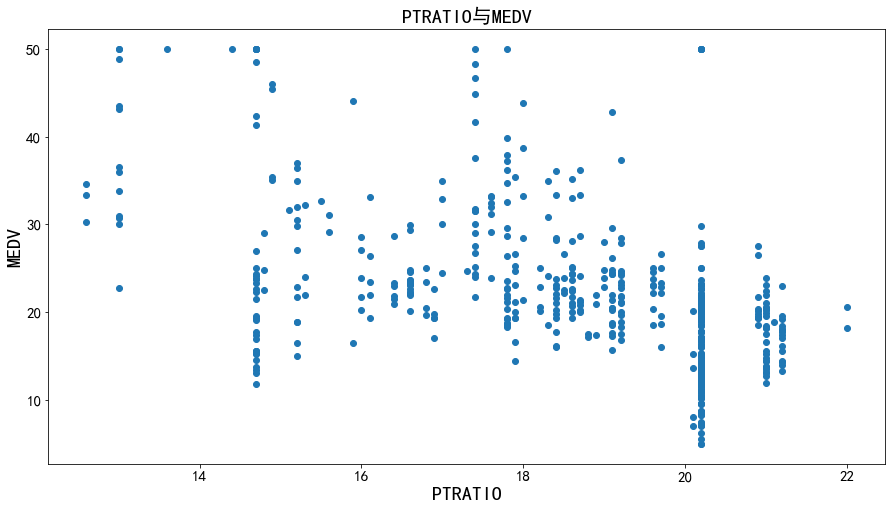

In [60]:
#学生和老师比例与房价的相关性    相关性强
plt.scatter(df['PTRATIO'],y)
plt.title('PTRATIO与MEDV',size=20)
plt.xlabel('PTRATIO',size=20)
plt.ylabel('MEDV',size=20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

_分析：由图可知，部分各镇的师生比率高的地方房价较低，而各镇的师生比率低的地方房价较高，说明相关性较高_

**下面是该特征对房价的预测值**

iteration:0  /  均方误差:1.454964
iteration:1  /  均方误差:0.811560
iteration:2  /  均方误差:0.467542
iteration:3  /  均方误差:0.283464
iteration:4  /  均方误差:0.184832
iteration:5  /  均方误差:0.131851
iteration:6  /  均方误差:0.103261
iteration:7  /  均方误差:0.087706
iteration:8  /  均方误差:0.079119
iteration:9  /  均方误差:0.074259
iteration:10  /  均方误差:0.071394
iteration:11  /  均方误差:0.069600
iteration:12  /  均方误差:0.068382
iteration:13  /  均方误差:0.067476
iteration:14  /  均方误差:0.066741
iteration:15  /  均方误差:0.066101
iteration:16  /  均方误差:0.065516
iteration:17  /  均方误差:0.064965
iteration:18  /  均方误差:0.064436
iteration:19  /  均方误差:0.063922
iteration:20  /  均方误差:0.063420
iteration:21  /  均方误差:0.062928
iteration:22  /  均方误差:0.062446
iteration:23  /  均方误差:0.061972
iteration:24  /  均方误差:0.061506
iteration:25  /  均方误差:0.061048
iteration:26  /  均方误差:0.060598
iteration:27  /  均方误差:0.060155
iteration:28  /  均方误差:0.059719
iteration:29  /  均方误差:0.059291
iteration:30  /  均方误差:0.058870
iteration:31  /  均方误差:0.058455
iteration:32  /  均

iteration:541  /  均方误差:0.033728
iteration:542  /  均方误差:0.033728
iteration:543  /  均方误差:0.033728
iteration:544  /  均方误差:0.033728
iteration:545  /  均方误差:0.033728
iteration:546  /  均方误差:0.033728
iteration:547  /  均方误差:0.033728
iteration:548  /  均方误差:0.033728
iteration:549  /  均方误差:0.033728
iteration:550  /  均方误差:0.033727
iteration:551  /  均方误差:0.033727
iteration:552  /  均方误差:0.033727
iteration:553  /  均方误差:0.033727
iteration:554  /  均方误差:0.033727
iteration:555  /  均方误差:0.033727
iteration:556  /  均方误差:0.033727
iteration:557  /  均方误差:0.033727
iteration:558  /  均方误差:0.033727
iteration:559  /  均方误差:0.033727
iteration:560  /  均方误差:0.033727
iteration:561  /  均方误差:0.033727
iteration:562  /  均方误差:0.033727
iteration:563  /  均方误差:0.033727
iteration:564  /  均方误差:0.033727
iteration:565  /  均方误差:0.033726
iteration:566  /  均方误差:0.033726
iteration:567  /  均方误差:0.033726
iteration:568  /  均方误差:0.033726
iteration:569  /  均方误差:0.033726
iteration:570  /  均方误差:0.033726
iteration:571  /  均方误差:0.033726
iteratio

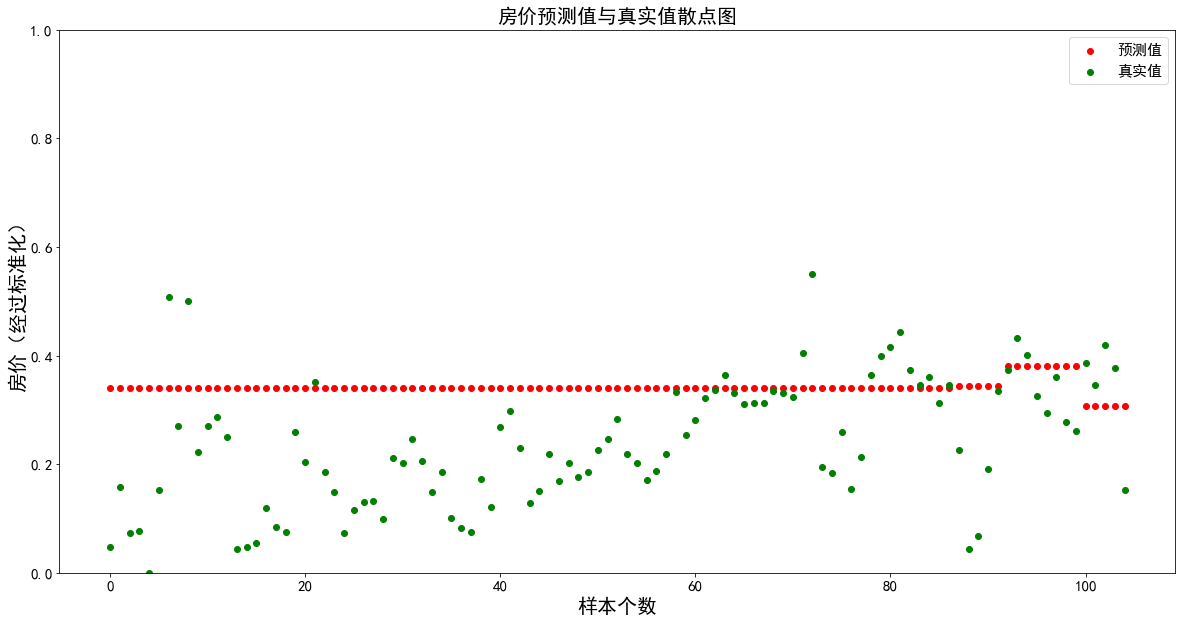

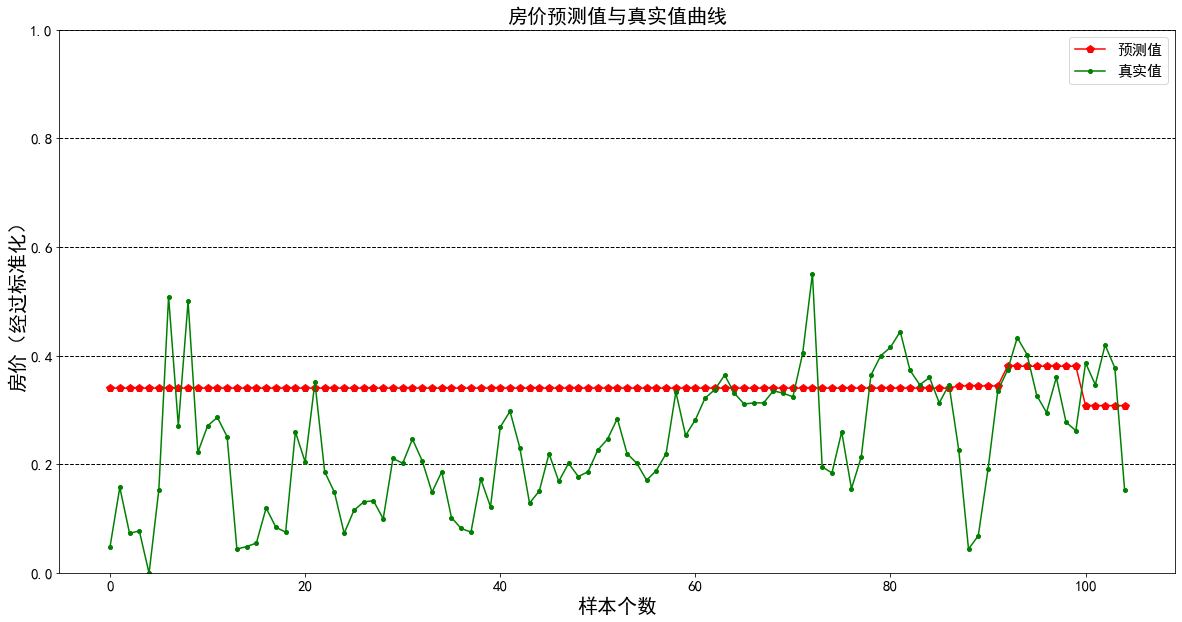

In [61]:
a10=LingerRegression_boston()                  #PTRATIO特征量对房价的预测
a10.separate([10], 1)
a10.gradient_descent()
a10.drawScatter()
a10.drawPlot()

***
***

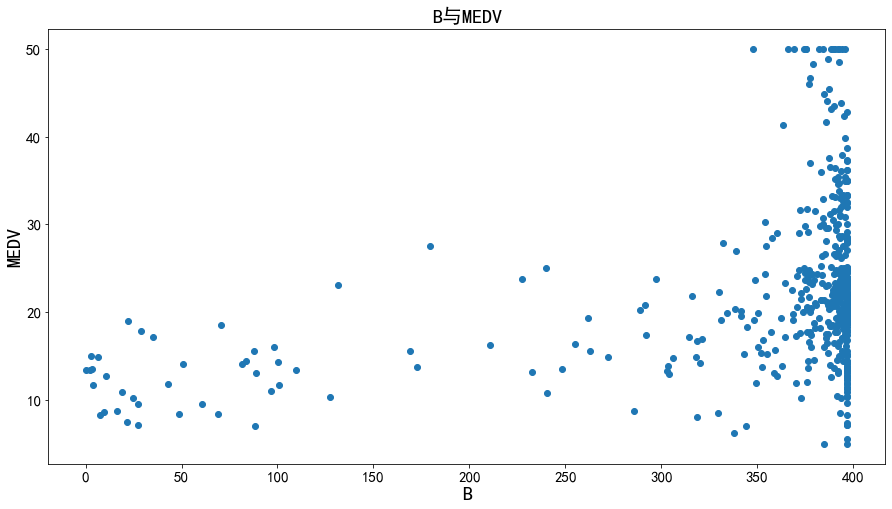

In [62]:
#黑人比例与房价的相关性
plt.scatter(df['B'],y)
plt.title('B与MEDV',size=20)
plt.xlabel('B',size=20)
plt.ylabel('MEDV',size=20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

_分析：由图看成，在黑人较多的地方房价有高有低，故相关性弱_

**下面是该特征对房价的预测值**

iteration:0  /  均方误差:2.382538
iteration:1  /  均方误差:0.928796
iteration:2  /  均方误差:0.377564
iteration:3  /  均方误差:0.168547
iteration:4  /  均方误差:0.089292
iteration:5  /  均方误差:0.059240
iteration:6  /  均方误差:0.047844
iteration:7  /  均方误差:0.043523
iteration:8  /  均方误差:0.041885
iteration:9  /  均方误差:0.041264
iteration:10  /  均方误差:0.041028
iteration:11  /  均方误差:0.040939
iteration:12  /  均方误差:0.040905
iteration:13  /  均方误差:0.040892
iteration:14  /  均方误差:0.040887
iteration:15  /  均方误差:0.040885
iteration:16  /  均方误差:0.040884
iteration:17  /  均方误差:0.040884
iteration:18  /  均方误差:0.040884
iteration:19  /  均方误差:0.040884
iteration:20  /  均方误差:0.040884
iteration:21  /  均方误差:0.040884
iteration:22  /  均方误差:0.040884
iteration:23  /  均方误差:0.040883
iteration:24  /  均方误差:0.040883
iteration:25  /  均方误差:0.040883
iteration:26  /  均方误差:0.040883
iteration:27  /  均方误差:0.040883
iteration:28  /  均方误差:0.040883
iteration:29  /  均方误差:0.040883
iteration:30  /  均方误差:0.040883
iteration:31  /  均方误差:0.040883
iteration:32  /  均

iteration:568  /  均方误差:0.040865
iteration:569  /  均方误差:0.040865
iteration:570  /  均方误差:0.040865
iteration:571  /  均方误差:0.040865
iteration:572  /  均方误差:0.040865
iteration:573  /  均方误差:0.040865
iteration:574  /  均方误差:0.040865
iteration:575  /  均方误差:0.040865
iteration:576  /  均方误差:0.040865
iteration:577  /  均方误差:0.040865
iteration:578  /  均方误差:0.040865
iteration:579  /  均方误差:0.040865
iteration:580  /  均方误差:0.040865
iteration:581  /  均方误差:0.040865
iteration:582  /  均方误差:0.040865
iteration:583  /  均方误差:0.040865
iteration:584  /  均方误差:0.040865
iteration:585  /  均方误差:0.040865
iteration:586  /  均方误差:0.040865
iteration:587  /  均方误差:0.040865
iteration:588  /  均方误差:0.040865
iteration:589  /  均方误差:0.040865
iteration:590  /  均方误差:0.040865
iteration:591  /  均方误差:0.040865
iteration:592  /  均方误差:0.040865
iteration:593  /  均方误差:0.040865
iteration:594  /  均方误差:0.040865
iteration:595  /  均方误差:0.040864
iteration:596  /  均方误差:0.040864
iteration:597  /  均方误差:0.040864
iteration:598  /  均方误差:0.040864
iteratio

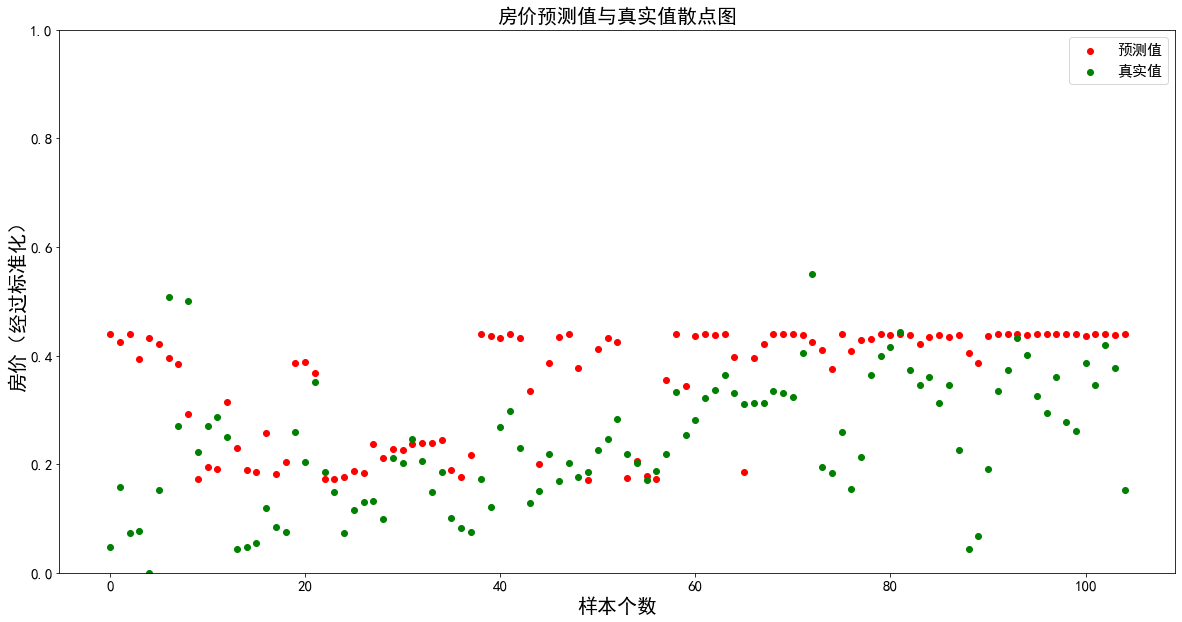

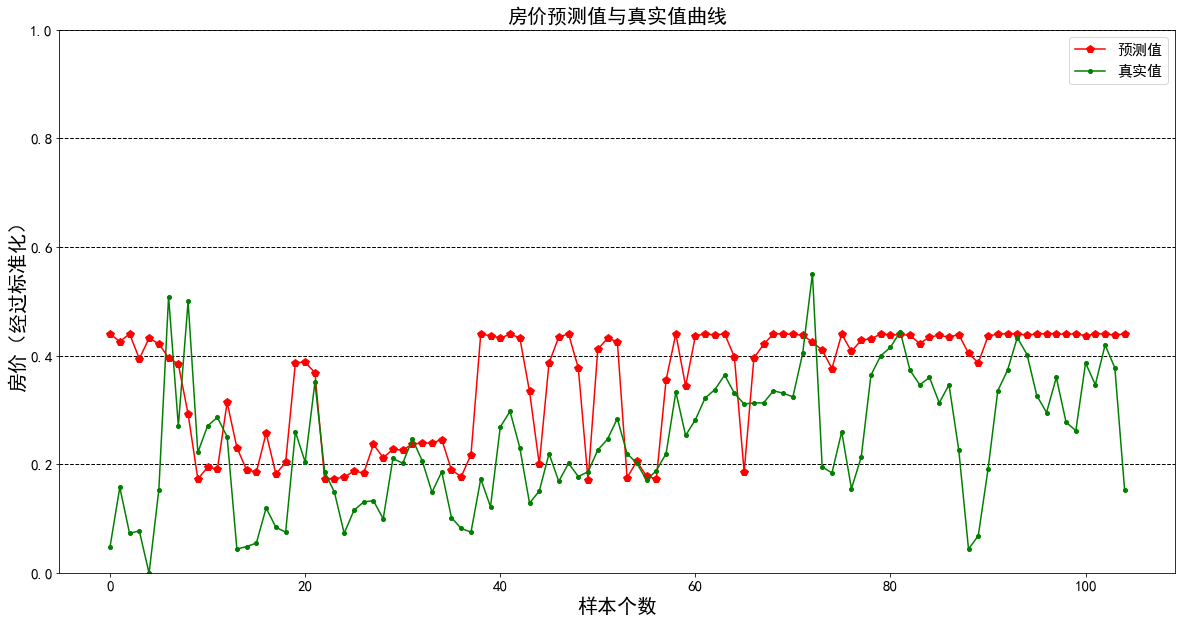

In [63]:
a11=LingerRegression_boston()                #B特征量对房价的预测
a11.separate([11], 1)
a11.gradient_descent()
a11.drawScatter()
a11.drawPlot()

***
***


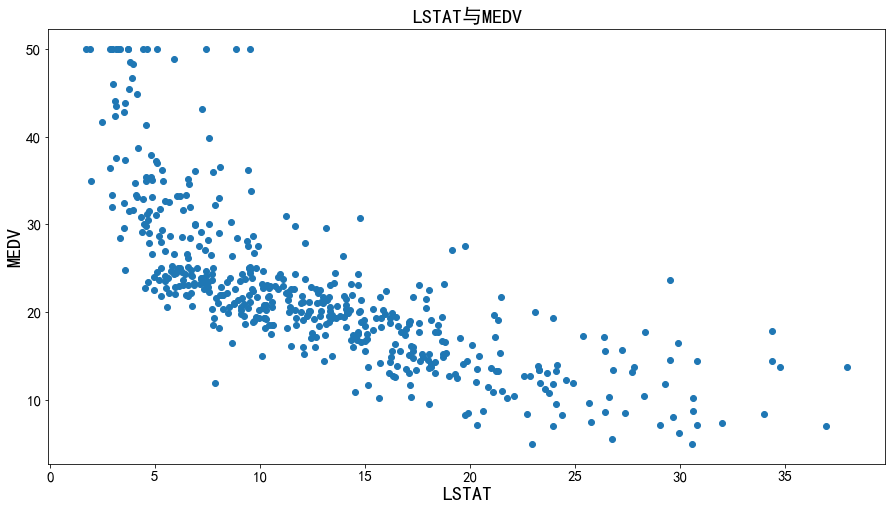

In [64]:
#低收入阶层占比与房价的相关性   相关性强
plt.scatter(df['LSTAT'],y)
plt.title('LSTAT与MEDV',size=20)
plt.xlabel('LSTAT',size=20)
plt.ylabel('MEDV',size=20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

_分析：由图可知，房价大致随低收入阶层占比增大而减小，故相关性教强，呈现负相关_

**下面是该特征对房价的预测值**

iteration:0  /  均方误差:0.828365
iteration:1  /  均方误差:0.550665
iteration:2  /  均方误差:0.378862
iteration:3  /  均方误差:0.272423
iteration:4  /  均方误差:0.206330
iteration:5  /  均方误差:0.165144
iteration:6  /  均方误差:0.139335
iteration:7  /  均方误差:0.123022
iteration:8  /  均方误差:0.112574
iteration:9  /  均方误差:0.105752
iteration:10  /  均方误差:0.101172
iteration:11  /  均方误差:0.097980
iteration:12  /  均方误差:0.095651
iteration:13  /  均方误差:0.093858
iteration:14  /  均方误差:0.092401
iteration:15  /  均方误差:0.091156
iteration:16  /  均方误差:0.090046
iteration:17  /  均方误差:0.089025
iteration:18  /  均方误差:0.088062
iteration:19  /  均方误差:0.087139
iteration:20  /  均方误差:0.086246
iteration:21  /  均方误差:0.085375
iteration:22  /  均方误差:0.084522
iteration:23  /  均方误差:0.083685
iteration:24  /  均方误差:0.082861
iteration:25  /  均方误差:0.082049
iteration:26  /  均方误差:0.081248
iteration:27  /  均方误差:0.080459
iteration:28  /  均方误差:0.079681
iteration:29  /  均方误差:0.078913
iteration:30  /  均方误差:0.078155
iteration:31  /  均方误差:0.077407
iteration:32  /  均

iteration:571  /  均方误差:0.021061
iteration:572  /  均方误差:0.021060
iteration:573  /  均方误差:0.021059
iteration:574  /  均方误差:0.021059
iteration:575  /  均方误差:0.021058
iteration:576  /  均方误差:0.021058
iteration:577  /  均方误差:0.021057
iteration:578  /  均方误差:0.021057
iteration:579  /  均方误差:0.021056
iteration:580  /  均方误差:0.021055
iteration:581  /  均方误差:0.021055
iteration:582  /  均方误差:0.021054
iteration:583  /  均方误差:0.021054
iteration:584  /  均方误差:0.021053
iteration:585  /  均方误差:0.021053
iteration:586  /  均方误差:0.021052
iteration:587  /  均方误差:0.021052
iteration:588  /  均方误差:0.021051
iteration:589  /  均方误差:0.021051
iteration:590  /  均方误差:0.021050
iteration:591  /  均方误差:0.021050
iteration:592  /  均方误差:0.021049
iteration:593  /  均方误差:0.021049
iteration:594  /  均方误差:0.021049
iteration:595  /  均方误差:0.021048
iteration:596  /  均方误差:0.021048
iteration:597  /  均方误差:0.021047
iteration:598  /  均方误差:0.021047
iteration:599  /  均方误差:0.021046
iteration:600  /  均方误差:0.021046
iteration:601  /  均方误差:0.021046
iteratio

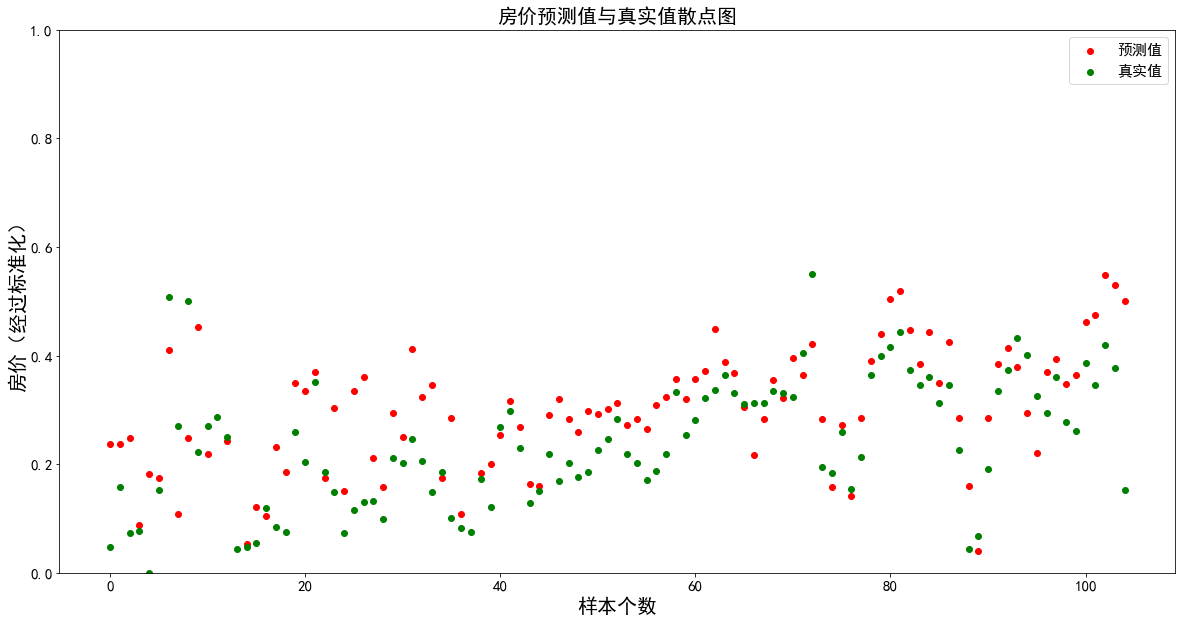

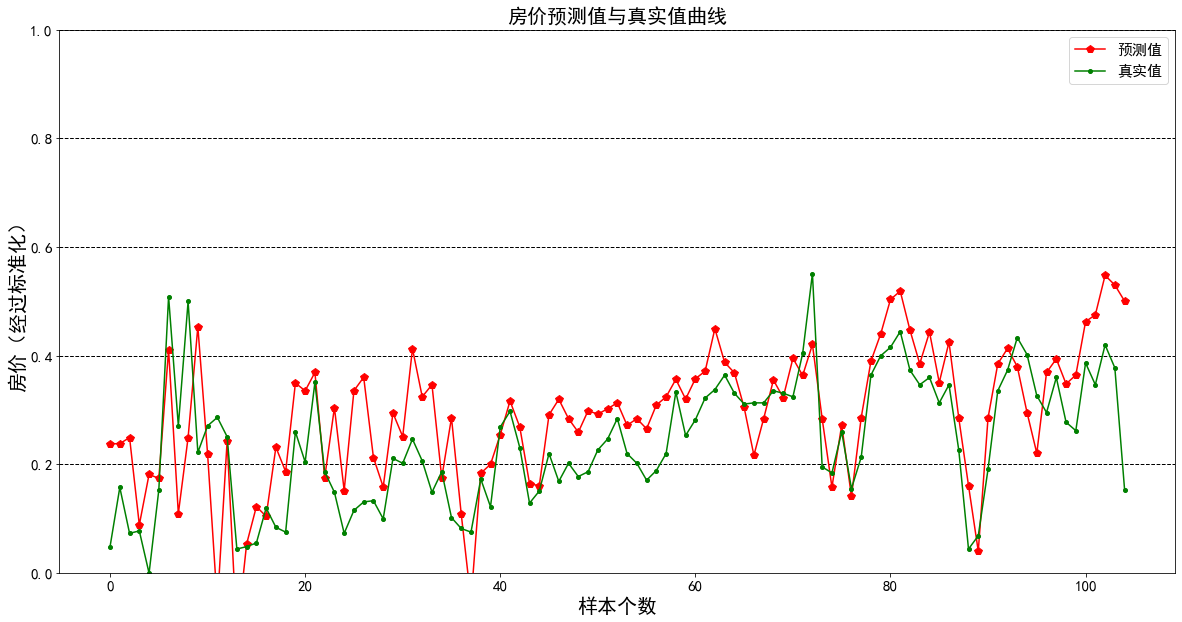

In [65]:
a12=LingerRegression_boston()            #LSTAT特征量对房价的预测
a12.separate([12], 1)
a12.gradient_descent()
a12.drawScatter()
a12.drawPlot()

***
***


***由上面各图每个特征对房价的拟合程度，不难发现，LSTAT和RM这两个特征量对房价拟合程度最高***

**下面是这两个特征对房价的预测**

iteration:0  /  均方误差:1.941514
iteration:1  /  均方误差:1.065271
iteration:2  /  均方误差:0.599017
iteration:3  /  均方误差:0.350708
iteration:4  /  均方误差:0.218259
iteration:5  /  均方误差:0.147404
iteration:6  /  均方误差:0.109300
iteration:7  /  均方误差:0.088613
iteration:8  /  均方误差:0.077191
iteration:9  /  均方误差:0.070703
iteration:10  /  均方误差:0.066845
iteration:11  /  均方误差:0.064393
iteration:12  /  均方误差:0.062694
iteration:13  /  均方误差:0.061404
iteration:14  /  均方误差:0.060338
iteration:15  /  均方误差:0.059399
iteration:16  /  均方误差:0.058532
iteration:17  /  均方误差:0.057712
iteration:18  /  均方误差:0.056923
iteration:19  /  均方误差:0.056157
iteration:20  /  均方误差:0.055409
iteration:21  /  均方误差:0.054677
iteration:22  /  均方误差:0.053960
iteration:23  /  均方误差:0.053257
iteration:24  /  均方误差:0.052567
iteration:25  /  均方误差:0.051890
iteration:26  /  均方误差:0.051225
iteration:27  /  均方误差:0.050572
iteration:28  /  均方误差:0.049931
iteration:29  /  均方误差:0.049302
iteration:30  /  均方误差:0.048685
iteration:31  /  均方误差:0.048079
iteration:32  /  均

iteration:519  /  均方误差:0.015011
iteration:520  /  均方误差:0.015010
iteration:521  /  均方误差:0.015010
iteration:522  /  均方误差:0.015009
iteration:523  /  均方误差:0.015008
iteration:524  /  均方误差:0.015007
iteration:525  /  均方误差:0.015007
iteration:526  /  均方误差:0.015006
iteration:527  /  均方误差:0.015005
iteration:528  /  均方误差:0.015004
iteration:529  /  均方误差:0.015004
iteration:530  /  均方误差:0.015003
iteration:531  /  均方误差:0.015002
iteration:532  /  均方误差:0.015001
iteration:533  /  均方误差:0.015001
iteration:534  /  均方误差:0.015000
iteration:535  /  均方误差:0.014999
iteration:536  /  均方误差:0.014998
iteration:537  /  均方误差:0.014998
iteration:538  /  均方误差:0.014997
iteration:539  /  均方误差:0.014996
iteration:540  /  均方误差:0.014996
iteration:541  /  均方误差:0.014995
iteration:542  /  均方误差:0.014994
iteration:543  /  均方误差:0.014993
iteration:544  /  均方误差:0.014993
iteration:545  /  均方误差:0.014992
iteration:546  /  均方误差:0.014991
iteration:547  /  均方误差:0.014991
iteration:548  /  均方误差:0.014990
iteration:549  /  均方误差:0.014989
iteratio

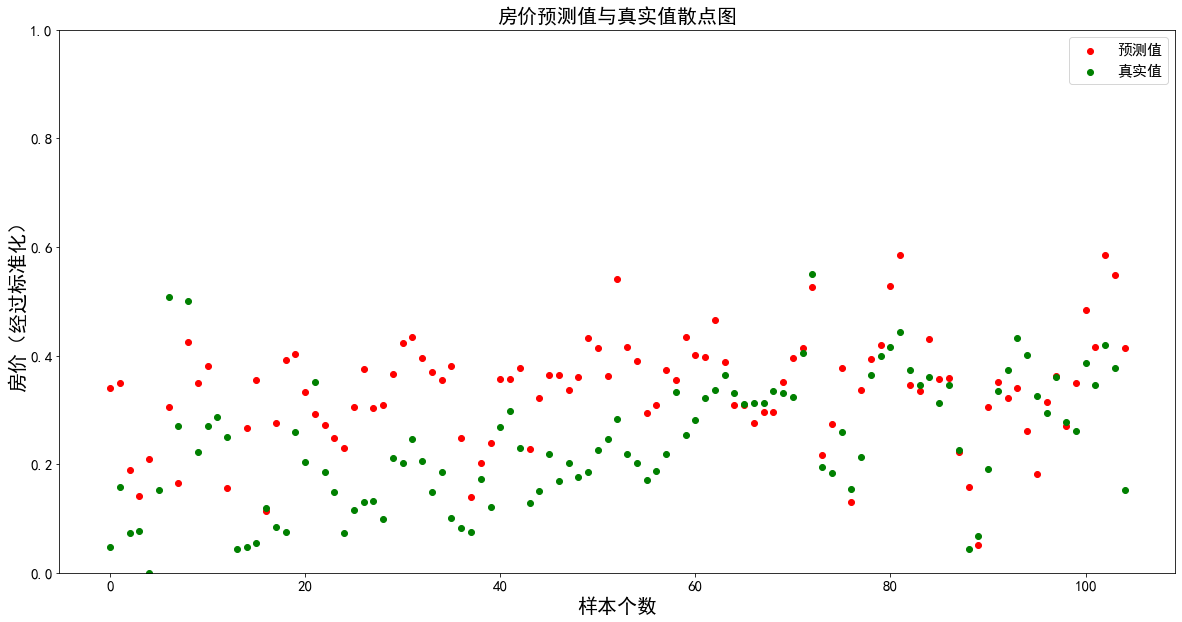

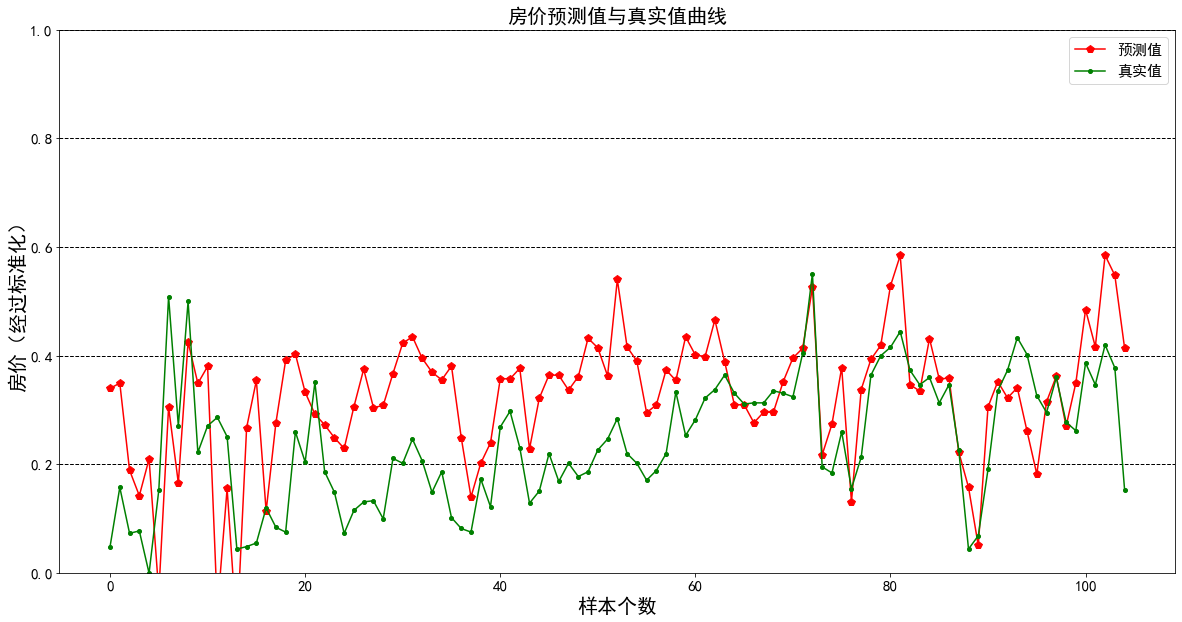

In [66]:
a13=LingerRegression_boston()            #LSTAT,RM特征量对房价的预测
a13.separate([5,12], 2)
a13.gradient_descent()
a13.drawScatter()
a13.drawPlot()

***
***
***

***最后，当我们把所有特征量都计算在内时，对房价的预测图如下：***

iteration:0  /  均方误差:28.902811
iteration:1  /  均方误差:2.905530
iteration:2  /  均方误差:0.573330
iteration:3  /  均方误差:0.348655
iteration:4  /  均方误差:0.312974
iteration:5  /  均方误差:0.295418
iteration:6  /  均方误差:0.280659
iteration:7  /  均方误差:0.267217
iteration:8  /  均方误差:0.254860
iteration:9  /  均方误差:0.243475
iteration:10  /  均方误差:0.232970
iteration:11  /  均方误差:0.223262
iteration:12  /  均方误差:0.214278
iteration:13  /  均方误差:0.205950
iteration:14  /  均方误差:0.198218
iteration:15  /  均方误差:0.191028
iteration:16  /  均方误差:0.184331
iteration:17  /  均方误差:0.178083
iteration:18  /  均方误差:0.172244
iteration:19  /  均方误差:0.166778
iteration:20  /  均方误差:0.161653
iteration:21  /  均方误差:0.156840
iteration:22  /  均方误差:0.152312
iteration:23  /  均方误差:0.148045
iteration:24  /  均方误差:0.144018
iteration:25  /  均方误差:0.140211
iteration:26  /  均方误差:0.136607
iteration:27  /  均方误差:0.133189
iteration:28  /  均方误差:0.129943
iteration:29  /  均方误差:0.126855
iteration:30  /  均方误差:0.123915
iteration:31  /  均方误差:0.121110
iteration:32  /  

iteration:537  /  均方误差:0.015620
iteration:538  /  均方误差:0.015613
iteration:539  /  均方误差:0.015605
iteration:540  /  均方误差:0.015597
iteration:541  /  均方误差:0.015590
iteration:542  /  均方误差:0.015582
iteration:543  /  均方误差:0.015575
iteration:544  /  均方误差:0.015567
iteration:545  /  均方误差:0.015560
iteration:546  /  均方误差:0.015552
iteration:547  /  均方误差:0.015545
iteration:548  /  均方误差:0.015537
iteration:549  /  均方误差:0.015530
iteration:550  /  均方误差:0.015523
iteration:551  /  均方误差:0.015515
iteration:552  /  均方误差:0.015508
iteration:553  /  均方误差:0.015501
iteration:554  /  均方误差:0.015493
iteration:555  /  均方误差:0.015486
iteration:556  /  均方误差:0.015479
iteration:557  /  均方误差:0.015472
iteration:558  /  均方误差:0.015464
iteration:559  /  均方误差:0.015457
iteration:560  /  均方误差:0.015450
iteration:561  /  均方误差:0.015443
iteration:562  /  均方误差:0.015436
iteration:563  /  均方误差:0.015429
iteration:564  /  均方误差:0.015422
iteration:565  /  均方误差:0.015415
iteration:566  /  均方误差:0.015408
iteration:567  /  均方误差:0.015401
iteratio

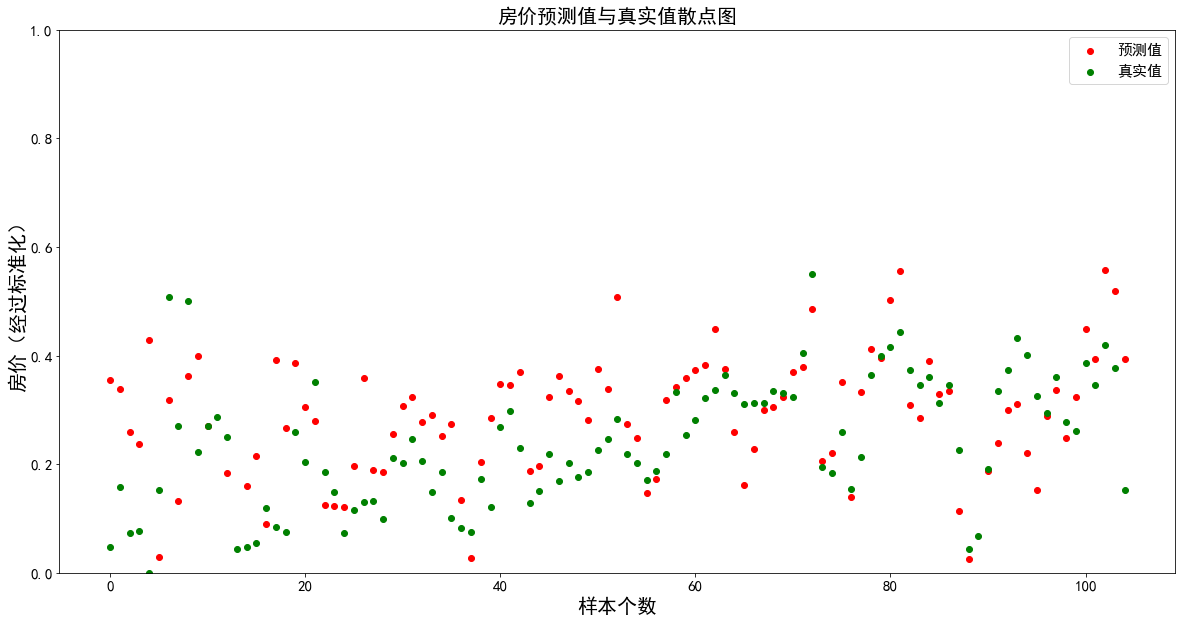

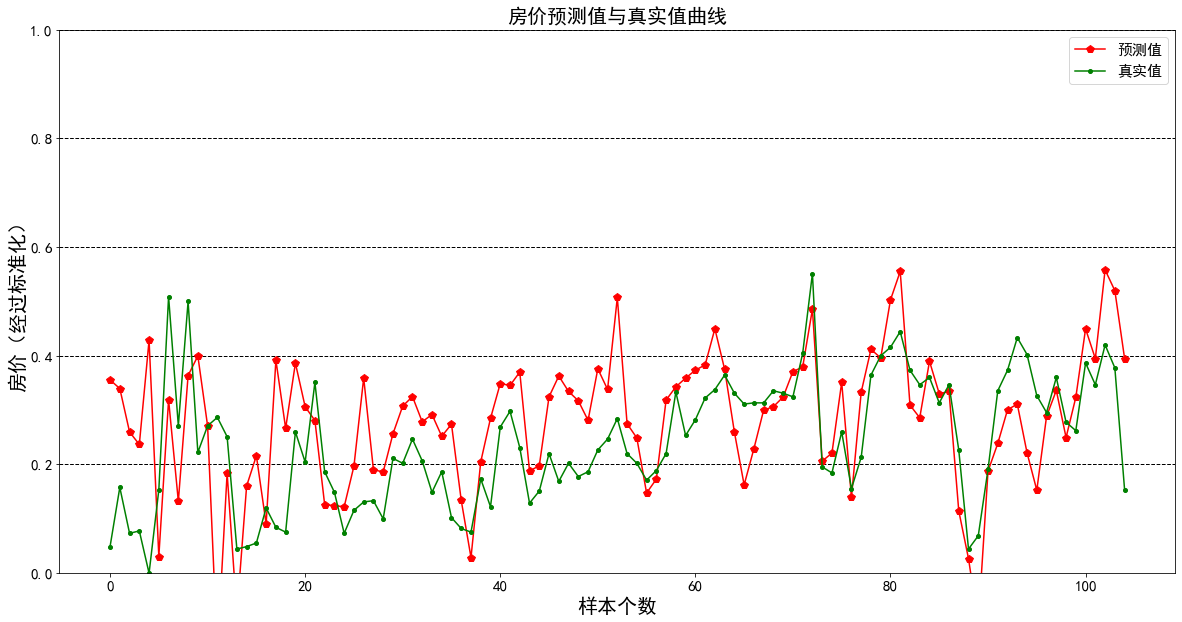

In [67]:
a14=LingerRegression_boston()            #LSTAT,RM特征量对房价的预测
a14.separate([0,1,2,3,4,5,6,7,8,9,10,11,12],13)
a14.gradient_descent()
a14.drawScatter()
a14.drawPlot()

## 总结：

**波士顿房价影响因素有13个，但根据相关系数，散点图，热力图来分析可得，相关性较大的特征量为LSTAT 和 RM**

**不同的特征量组合起来可能会有不同的拟合效果**

**再进行梯度下降时要先进行标准化数据样本值，便于减少各个特征量数值大小不同而带来的差异，便于更好的梯度下降**

**选择合适的学习率，可以令梯度下降更快达到最小值（收敛），反之，如果学习率选择过小，可能会需要十分庞大的迭代次数，学习率过大，有可能达不到最小值，反而会溢出**